# Volume Correlation CV
Author: Joel Enrique Díaz Villanueva   
Organisation: Universidad de Monterrey   

---

<a name="python-implementation"></a>
## Python implementation

<a name='required-standard-libraries'></a>
### Required standard libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_key = pd.read_excel('/content/key.xlsx')
df_key

PHASE        PTID   RID VISCODE VISCODE2  IMAGEUID   EXAMDATE    RUNDATE  \
0    ADNI1  031_S_0830   830     m24      m24    124115 2008-09-25 2024-11-15   
1    ADNI2  006_S_4363  4363     v11      m12    352001 2012-12-14 2022-08-08   
2    ADNI2  128_S_2130  2130     v11      m24    357762 2013-01-23 2022-10-05   
3    ADNI2  072_S_4462  4462     v11      m12    363365 2013-02-14 2022-08-14   
4    ADNI2  137_S_0972   972     v11      m72    357731 2012-11-30 2022-10-01   
5    ADNI2  099_S_4157  4157     v11      m12    340545 2012-09-25 2022-08-14   
6    ADNI2  032_S_4823  4823     v11      m12    388428 2013-07-22 2022-09-25   
7    ADNI2  130_S_2373  2373     v21      m36    424962 2014-05-12 2022-10-11   
8    ADNI2  041_S_4720  4720     v11      m12    374625 2013-05-17 2022-09-25   
9    ADNI2  137_S_4623  4623     v11      m12    373201 2013-05-13 2022-10-03   
10   ADNI2  013_S_1186  1186     v11      m72    395167 2013-01-29 2022-09-16   
11   ADNI2  002_S_4521  4521     v11      m12    364636 2013-03-15 2022-08-02   
12   ADNI2  137_S_4631  4631     v21      m24    437694 2014-06-09 2022-10-01   
13   ADNI2  036_S_4714  4714     v21      m24    434255 2014-06-10 2022-09-25   
14   ADNI3  035_S_4114  4114    init      m72    919448 2017-09-22 2024-11-19   
15  ADNIGO  141_S_2210  2210     m06      m06    258633 2011-08-09 2022-10-04   
16   ADNI2  041_S_4143  4143     v41      m48    544750 2015-08-25 2022-09-25   
17   ADNI2  011_S_4893  4893     v21      m24    451360 2014-09-17 2022-09-16   
18   ADNI3  114_S_5047  5047    init      m54   1036017 2018-07-24 2022-08-13   
19  ADNIGO  002_S_1268  1268     m48      m48    229307 2011-04-13 2022-08-02   
20   ADNI2  041_S_4138  4138     v41      m48    525918 2015-08-20 2022-09-25   
21   ADNI2  037_S_4030  4030     v11      m12    308088 2012-05-14 2022-09-25   
22   ADNI2  035_S_4582  4582     v21      m24    448284 2014-03-26 2022-09-25   
23   ADNI2  002_S_4746  4746     v11      m12    377153 2013-06-03 2022-08-02   
24   ADNI2  022_S_2087  2087     v06      m24    349248 2012-11-02 2022-09-21   
25   ADNI2  130_S_2403  2403     v06      m12    350686 2012-10-18 2022-10-03   
26   ADNI2  067_S_2195  2195     v11      m24    351400 2012-12-05 2022-08-11   
27   ADNI2  137_S_4331  4331     v21      m24    431706 2013-12-04 2022-10-02   

     STATUS  FSVER  ...        ST147SV        ST148SV        ST149SV  \
0   partial  7.2.0  ...  208502.547015  203830.985954  412333.532969   
1   partial  7.2.0  ...  185543.376436  193573.580121  379116.956557   
2   partial  7.2.0  ...  239542.502215  236423.755132  475966.257347   
3   partial  7.2.0  ...  213506.008898  219250.995311  432757.004209   
4   partial  7.2.0  ...  193444.767932  201071.736265  394516.504197   
5   partial  7.2.0  ...  178577.941375  175400.423423  353978.364798   
6   partial  7.2.0  ...  196587.119500  191141.854000  387728.973500   
7   partial  7.2.0  ...  159716.557143  157629.596426  317346.153569   
8   partial  7.2.0  ...  229640.691294  233271.551629  462912.242922   
9   partial  7.2.0  ...  216145.839696  218050.687075  434196.526771   
10  partial  7.2.0  ...  197825.698235  197109.709117  394935.407352   
11  partial  7.2.0  ...  212734.890367  221558.873346  434293.763712   
12  partial  7.2.0  ...  237085.690673  232825.149213  469910.839886   
13  partial  7.2.0  ...  207415.336289  208323.057942  415738.394231   
14  partial  7.2.0  ...  204803.131634  202506.433614  407309.565248   
15  partial  7.2.0  ...  212141.548752  204379.684486  416521.233238   
16  partial  7.2.0  ...  179088.315882  186540.674760  365628.990642   
17  partial  7.2.0  ...  188809.871674  194034.021971  382843.893645   
18  partial  7.2.0  ...  201910.512960  197657.926119  399568.439079   
19  partial  7.2.0  ...  194819.324845  193327.303284  388146.628128   
20  partial  7.2.0  ...  200728.939079  202507.862818  403236.801897   
21  partial  7.2.0  ...  210843.140522  207045.955213  417889.095735   

In [3]:
# Filter only columns ending in "SA" and the "PTID" column
df_filtered = df_key.filter(regex='CV$|^PTID$')

df_filtered = df_filtered.T

df_filtered

0           1           2           3           4   \
PTID     031_S_0830  006_S_4363  128_S_2130  072_S_4462  137_S_0972   
ST102CV        3472        2825        3562        4025        3775   
ST103CV        1415        1707        1595        2388        1993   
ST104CV        3297        3291        2698        3462        3239   
ST105CV        2781        2231        2596        2687        2220   
...             ...         ...         ...         ...         ...   
ST94CV        12078       10563       15959       13490        8510   
ST95CV         7012        5907        6562        6891        6284   
ST97CV         7658        6366        8404        9664        5095   
ST98CV         4938        4862        4908        5183        4567   
ST99CV         9259        9874       11491       12886        9290   

                 5           6           7           8           9   ...  \
PTID     099_S_4157  032_S_4823  130_S_2373  041_S_4720  137_S_4623  ...   
ST102CV        2808        3395        2492        3809        3553  ...   
ST103CV        1310        1811        1424        1824        1964  ...   
ST104CV        2893        3425        2352        3893        3322  ...   
ST105CV        1654        2595        2084        2848        2676  ...   
...             ...         ...         ...         ...         ...  ...   
ST94CV         9065       13787        7831       12406        9248  ...   
ST95CV         5342        6057        4908        7188        5756  ...   
ST97CV         5122        6840        5690        7756        5000  ...   
ST98CV         4339        4514        4120        5259        4950  ...   
ST99CV         8516        8791        7736       11383       12739  ...   

                 18          19          20          21          22  \
PTID     114_S_5047  002_S_1268  041_S_4138  037_S_4030  035_S_4582   
ST102CV        3825        3700        3132        3372        3348   
ST103CV        1607        1628        1443        1601        1536   
ST104CV        3037        3112        3578        4088        2544   
ST105CV        2227        2568        2595        2455        2429   
...             ...         ...         ...         ...         ...   
ST94CV         7838        9130       12010       10989       11834   
ST95CV         6704        6187        6796        6289        6088   
ST97CV         5283        5340        5942        7602        5152   
ST98CV         5020        4306        4464        4793        5451   
ST99CV         8586        9931       10773        9702        7754   

                 23          24          25          26          27  
PTID     002_S_4746  022_S_2087  130_S_2403  067_S_2195  137_S_4331  
ST102CV        3140        3272        3300        3777        3649  
ST103CV        1715        1843        1598        1708        2084  
ST104CV        3048        2808        3626        3735        3899  
ST105CV        2134        2526        2038        2299        2357  
...             ...         ...         ...         ...         ...  
ST94CV        11374        8536        9881       13666       10470  
ST95CV         6222        7260        6508        6877        7181  
ST97CV         6076        7044        6459        6021        6470  
ST98CV         4410        5321        4732        5534        5376  
ST99CV        10163       11094       10239        9329       10459  

[70 rows x 28 columns]

In [4]:
df_filtered = df_filtered.dropna()

df_filtered

0           1           2           3           4   \
PTID     031_S_0830  006_S_4363  128_S_2130  072_S_4462  137_S_0972   
ST102CV        3472        2825        3562        4025        3775   
ST103CV        1415        1707        1595        2388        1993   
ST104CV        3297        3291        2698        3462        3239   
ST105CV        2781        2231        2596        2687        2220   
...             ...         ...         ...         ...         ...   
ST94CV        12078       10563       15959       13490        8510   
ST95CV         7012        5907        6562        6891        6284   
ST97CV         7658        6366        8404        9664        5095   
ST98CV         4938        4862        4908        5183        4567   
ST99CV         9259        9874       11491       12886        9290   

                 5           6           7           8           9   ...  \
PTID     099_S_4157  032_S_4823  130_S_2373  041_S_4720  137_S_4623  ...   
ST102CV        2808        3395        2492        3809        3553  ...   
ST103CV        1310        1811        1424        1824        1964  ...   
ST104CV        2893        3425        2352        3893        3322  ...   
ST105CV        1654        2595        2084        2848        2676  ...   
...             ...         ...         ...         ...         ...  ...   
ST94CV         9065       13787        7831       12406        9248  ...   
ST95CV         5342        6057        4908        7188        5756  ...   
ST97CV         5122        6840        5690        7756        5000  ...   
ST98CV         4339        4514        4120        5259        4950  ...   
ST99CV         8516        8791        7736       11383       12739  ...   

                 18          19          20          21          22  \
PTID     114_S_5047  002_S_1268  041_S_4138  037_S_4030  035_S_4582   
ST102CV        3825        3700        3132        3372        3348   
ST103CV        1607        1628        1443        1601        1536   
ST104CV        3037        3112        3578        4088        2544   
ST105CV        2227        2568        2595        2455        2429   
...             ...         ...         ...         ...         ...   
ST94CV         7838        9130       12010       10989       11834   
ST95CV         6704        6187        6796        6289        6088   
ST97CV         5283        5340        5942        7602        5152   
ST98CV         5020        4306        4464        4793        5451   
ST99CV         8586        9931       10773        9702        7754   

                 23          24          25          26          27  
PTID     002_S_4746  022_S_2087  130_S_2403  067_S_2195  137_S_4331  
ST102CV        3140        3272        3300        3777        3649  
ST103CV        1715        1843        1598        1708        2084  
ST104CV        3048        2808        3626        3735        3899  
ST105CV        2134        2526        2038        2299        2357  
...             ...         ...         ...         ...         ...  
ST94CV        11374        8536        9881       13666       10470  
ST95CV         6222        7260        6508        6877        7181  
ST97CV         6076        7044        6459        6021        6470  
ST98CV         4410        5321        4732        5534        5376  
ST99CV        10163       11094       10239        9329       10459  

[70 rows x 28 columns]

Add new patients from the ADNI database (Freesurfer 7.4.1)

ST102CV N mm3 Volume (Cortical Parcellation) of RightParacentral

ST103CV N mm3 Volume (Cortical Parcellation) of RightParahippocampal

ST104CV N mm3 Volume (Cortical Parcellation) of RightParsOpercularis

ST105CV N mm3 Volume (Cortical Parcellation) of RightParsOrbitalis

ST106CV N mm3 Volume (Cortical Parcellation) of RightParsTriangularis

ST107CV N mm3 Volume (Cortical Parcellation) of RightPericalcarine

ST108CV N mm3 Volume (Cortical Parcellation) of RightPostcentral

ST109CV N mm3 Volume (Cortical Parcellation) of RightPosteriorCingulate

ST10CV N mm3 Volume (Cortical Parcellation) of Icv

ST110CV N mm3 Volume (Cortical Parcellation) of RightPrecentral

ST111CV N mm3 Volume (Cortical Parcellation) of RightPrecuneus

ST113CV N mm3 Volume (Cortical Parcellation) of RightRostralAnteriorCingulate

ST114CV N mm3 Volume (Cortical Parcellation) of RightRostralMiddleFrontal

ST115CV N mm3 Volume (Cortical Parcellation) of RightSuperiorFrontal

ST116CV N mm3 Volume (Cortical Parcellation) of RightSuperiorParietal

ST117CV N mm3 Volume (Cortical Parcellation) of RightSuperiorTemporal

ST118CV N mm3 Volume (Cortical Parcellation) of RightSupramarginal

ST119CV N mm3 Volume (Cortical Parcellation) of RightTemporalPole

ST121CV N mm3 Volume (Cortical Parcellation) of RightTransverseTemporal

ST129CV N mm3 Cortical Volume (aparc.stats) of LeftInsula

ST130CV N mm3 Cortical Volume (aparc.stats) of RightInsula

ST13CV N mm3 Volume (Cortical Parcellation) of LeftBankssts

ST14CV N mm3 Volume (Cortical Parcellation) of LeftCaudalAnteriorCingulate

ST15CV N mm3 Volume (Cortical Parcellation) of LeftCaudalMiddleFrontal

ST23CV N mm3 Volume (Cortical Parcellation) of LeftCuneus

ST24CV N mm3 Volume (Cortical Parcellation) of LeftEntorhinal

ST25CV N mm3 Volume (Cortical Parcellation) of LeftFrontalPole

ST26CV N mm3 Volume (Cortical Parcellation) of LeftFusiform

ST31CV N mm3 Volume (Cortical Parcellation) of LeftInferiorParietal

ST32CV N mm3 Volume (Cortical Parcellation) of LeftInferiorTemporal

ST34CV N mm3 Volume (Cortical Parcellation) of LeftIsthmusCingulate

ST35CV N mm3 Volume (Cortical Parcellation) of LeftLateralOccipital

ST36CV N mm3 Volume (Cortical Parcellation) of LeftLateralOrbitofrontal

ST38CV N mm3 Volume (Cortical Parcellation) of LeftLingual

ST39CV N mm3 Volume (Cortical Parcellation) of LeftMedialOrbitofrontal

ST40CV N mm3 Volume (Cortical Parcellation) of LeftMiddleTemporal

ST43CV N mm3 Volume (Cortical Parcellation) of LeftParacentral

ST44CV N mm3 Volume (Cortical Parcellation) of LeftParahippocampal

ST45CV N mm3 Volume (Cortical Parcellation) of LeftParsOpercularis

ST46CV N mm3 Volume (Cortical Parcellation) of LeftParsOrbitalis

ST47CV N mm3 Volume (Cortical Parcellation) of LeftParsTriangularis

ST48CV N mm3 Volume (Cortical Parcellation) of LeftPericalcarine

ST49CV N mm3 Volume (Cortical Parcellation) of LeftPostcentral

ST50CV N mm3 Volume (Cortical Parcellation) of LeftPosteriorCingulate

ST51CV N mm3 Volume (Cortical Parcellation) of LeftPrecentral

ST52CV N mm3 Volume (Cortical Parcellation) of LeftPrecuneus

ST54CV N mm3 Volume (Cortical Parcellation) of LeftRostralAnteriorCingulate

ST55CV N mm3 Volume (Cortical Parcellation) of LeftRostralMiddleFrontal

ST56CV N mm3 Volume (Cortical Parcellation) of LeftSuperiorFrontal

ST57CV N mm3 Volume (Cortical Parcellation) of LeftSuperiorParietal

ST58CV N mm3 Volume (Cortical Parcellation) of LeftSuperiorTemporal

ST59CV N mm3 Volume (Cortical Parcellation) of LeftSupramarginal

ST60CV N mm3 Volume (Cortical Parcellation) of LeftTemporalPole

ST62CV N mm3 Volume (Cortical Parcellation) of LeftTransverseTemporal

ST72CV N mm3 Volume (Cortical Parcellation) of RightBankssts

ST73CV N mm3 Volume (Cortical Parcellation) of RightCaudalAnteriorCingulate

ST74CV N mm3 Volume (Cortical Parcellation) of RightCaudalMiddleFrontal

ST82CV N mm3 Volume (Cortical Parcellation) of RightCuneus

ST83CV N mm3 Volume (Cortical Parcellation) of RightEntorhinal

ST84CV N mm3 Volume (Cortical Parcellation) of RightFrontalPole

ST85CV N mm3 Volume (Cortical Parcellation) of RightFusiform

ST90CV N mm3 Volume (Cortical Parcellation) of RightInferiorParietal

ST91CV N mm3 Volume (Cortical Parcellation) of RightInferiorTemporal

ST93CV N mm3 Volume (Cortical Parcellation) of RightIsthmusCingulate

ST94CV N mm3 Volume (Cortical Parcellation) of RightLateralOccipital

ST95CV N mm3 Volume (Cortical Parcellation) of RightLateralOrbitofrontal

ST97CV N mm3 Volume (Cortical Parcellation) of RightLingual

ST98CV N mm3 Volume (Cortical Parcellation) of RightMedialOrbitofrontal

ST99CV N mm3 Volume (Cortical Parcellation) of RightMiddleTemporal



In [5]:
df_filtered.rename(index={'ST102CV': 'ctx-rh-paracentral'}, inplace=True)
df_filtered.rename(index={'ST103CV': 'ctx-rh-parahippocampal'}, inplace=True)
df_filtered.rename(index={'ST104CV': 'ctx-rh-parsopercularis'}, inplace=True)
df_filtered.rename(index={'ST105CV': 'ctx-rh-parsorbitalis'}, inplace=True)
df_filtered.rename(index={'ST106CV': 'ctx-rh-parstriangularis'}, inplace=True)
df_filtered.rename(index={'ST107CV': 'ctx-rh-pericalcarine'}, inplace=True)
df_filtered.rename(index={'ST108CV': 'ctx-rh-postcentral'}, inplace=True)
df_filtered.rename(index={'ST109CV': 'ctx-rh-posteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST110CV': 'ctx-rh-precentral'}, inplace=True)
df_filtered.rename(index={'ST111CV': 'ctx-rh-precuneus'}, inplace=True)
df_filtered.rename(index={'ST113CV': 'ctx-rh-rostralanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST114CV': 'ctx-rh-rostralmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST115CV': 'ctx-rh-superiorfrontal'}, inplace=True)
df_filtered.rename(index={'ST116CV': 'ctx-rh-superiorparietal'}, inplace=True)
df_filtered.rename(index={'ST117CV': 'ctx-rh-superiortemporal'}, inplace=True)
df_filtered.rename(index={'ST118CV': 'ctx-rh-supramarginal'}, inplace=True)
df_filtered.rename(index={'ST119CV': 'ctx-rh-temporalpole'}, inplace=True)
df_filtered.rename(index={'ST121CV': 'ctx-rh-transversetemporal'}, inplace=True)
df_filtered.rename(index={'ST129CV': 'ctx-lh-insula'}, inplace=True)
df_filtered.rename(index={'ST130CV': 'ctx-rh-insula'}, inplace=True)
df_filtered.rename(index={'ST13CV': 'ctx-lh-bankssts'}, inplace=True)
df_filtered.rename(index={'ST14CV': 'ctx-lh-caudalanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST15CV': 'ctx-lh-caudalmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST23CV': 'ctx-lh-cuneus'}, inplace=True)
df_filtered.rename(index={'ST24CV': 'ctx-lh-entorhinal'}, inplace=True)
df_filtered.rename(index={'ST25CV': 'ctx-lh-frontalpole'}, inplace=True)
df_filtered.rename(index={'ST26CV': 'ctx-lh-fusiform'}, inplace=True)
df_filtered.rename(index={'ST31CV': 'ctx-lh-inferiorparietal'}, inplace=True)
df_filtered.rename(index={'ST32CV': 'ctx-lh-inferiortemporal'}, inplace=True)
df_filtered.rename(index={'ST34CV': 'ctx-lh-isthmuscingulate'}, inplace=True)
df_filtered.rename(index={'ST35CV': 'ctx-lh-lateraloccipital'}, inplace=True)
df_filtered.rename(index={'ST36CV': 'ctx-lh-lateralorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST38CV': 'ctx-lh-lingual'}, inplace=True)
df_filtered.rename(index={'ST39CV': 'ctx-lh-medialorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST40CV': 'ctx-lh-middletemporal'}, inplace=True)
df_filtered.rename(index={'ST43CV': 'ctx-lh-paracentral'}, inplace=True)
df_filtered.rename(index={'ST44CV': 'ctx-lh-parahippocampal'}, inplace=True)
df_filtered.rename(index={'ST45CV': 'ctx-lh-parsopercularis'}, inplace=True)
df_filtered.rename(index={'ST46CV': 'ctx-lh-parsorbitalis'}, inplace=True)
df_filtered.rename(index={'ST47CV': 'ctx-lh-parstriangularis'}, inplace=True)
df_filtered.rename(index={'ST48CV': 'ctx-lh-pericalcarine'}, inplace=True)
df_filtered.rename(index={'ST49CV': 'ctx-lh-postcentral'}, inplace=True)
df_filtered.rename(index={'ST50CV': 'ctx-lh-posteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST51CV': 'ctx-lh-precentral'}, inplace=True)
df_filtered.rename(index={'ST52CV': 'ctx-lh-precuneus'}, inplace=True)
df_filtered.rename(index={'ST54CV': 'ctx-lh-rostralanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST55CV': 'ctx-lh-rostralmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST56CV': 'ctx-lh-superiorfrontal'}, inplace=True)
df_filtered.rename(index={'ST57CV': 'ctx-lh-superiorparietal'}, inplace=True)
df_filtered.rename(index={'ST58CV': 'ctx-lh-superiortemporal'}, inplace=True)
df_filtered.rename(index={'ST59CV': 'ctx-lh-supramarginal'}, inplace=True)
df_filtered.rename(index={'ST60CV': 'ctx-lh-temporalpole'}, inplace=True)
df_filtered.rename(index={'ST62CV': 'ctx-lh-transversetemporal'}, inplace=True)
df_filtered.rename(index={'ST72CV': 'ctx-rh-bankssts'}, inplace=True)
df_filtered.rename(index={'ST73CV': 'ctx-rh-caudalanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST74CV': 'ctx-rh-caudalmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST82CV': 'ctx-rh-cuneus'}, inplace=True)
df_filtered.rename(index={'ST83CV': 'ctx-rh-entorhinal'}, inplace=True)
df_filtered.rename(index={'ST84CV': 'ctx-rh-frontalpole'}, inplace=True)
df_filtered.rename(index={'ST85CV': 'ctx-rh-fusiform'}, inplace=True)
df_filtered.rename(index={'ST90CV': 'ctx-rh-inferiorparietal'}, inplace=True)
df_filtered.rename(index={'ST91CV': 'ctx-rh-inferiortemporal'}, inplace=True)
df_filtered.rename(index={'ST93CV': 'ctx-rh-isthmuscingulate'}, inplace=True)
df_filtered.rename(index={'ST94CV': 'ctx-rh-lateraloccipital'}, inplace=True)
df_filtered.rename(index={'ST95CV': 'ctx-rh-lateralorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST97CV': 'ctx-rh-lingual'}, inplace=True)
df_filtered.rename(index={'ST98CV': 'ctx-rh-medialorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST99CV': 'ctx-rh-middletemporal'}, inplace=True)


df_filtered = df_filtered.drop(index='ST10CV')


df_filtered = df_filtered.T

df_filtered

PTID ctx-rh-paracentral ctx-rh-parahippocampal  \
0   031_S_0830               3472                   1415   
1   006_S_4363               2825                   1707   
2   128_S_2130               3562                   1595   
3   072_S_4462               4025                   2388   
4   137_S_0972               3775                   1993   
5   099_S_4157               2808                   1310   
6   032_S_4823               3395                   1811   
7   130_S_2373               2492                   1424   
8   041_S_4720               3809                   1824   
9   137_S_4623               3553                   1964   
10  013_S_1186               3272                   1690   
11  002_S_4521               3034                   2031   
12  137_S_4631               3331                   1624   
13  036_S_4714               2863                   1834   
14  035_S_4114               3598                   1678   
15  141_S_2210               3670                   2059   
16  041_S_4143               3081                   1527   
17  011_S_4893               3332                   1707   
18  114_S_5047               3825                   1607   
19  002_S_1268               3700                   1628   
20  041_S_4138               3132                   1443   
21  037_S_4030               3372                   1601   
22  035_S_4582               3348                   1536   
23  002_S_4746               3140                   1715   
24  022_S_2087               3272                   1843   
25  130_S_2403               3300                   1598   
26  067_S_2195               3777                   1708   
27  137_S_4331               3649                   2084   

   ctx-rh-parsopercularis ctx-rh-parsorbitalis ctx-rh-parstriangularis  \
0                    3297                 2781                    3430   
1                    3291                 2231                    3224   
2                    2698                 2596                    3289   
3                    3462                 2687                    2873   
4                    3239                 2220                    3749   
5                    2893                 1654                    3167   
6                    3425                 2595                    3665   
7                    2352                 2084                    2870   
8                    3893                 2848                    3575   
9                    3322                 2676                    3139   
10                   3693                 2542                    3482   
11                   4873                 2924                    4996   
12                   2917                 2615                    3778   
13                   3876                 2412                    3549   
14                   4310                 2109                    3281   
15                   2838                 2676                    4413   
16                   2969                 2393                    2863   
17                   3150                 2631                    3049   
18                   3037                 2227                    3561   
19                   3112                 2568                    3283   
20                   3578                 2595                    3933   
21                   4088                 2455                    4007   
22                   2544                 2429                    2877   
23                   3048                 2134                    3053   
24                   2808                 2526                    3099   
25                   3626                 2038                    3841   
26                   3735                 2299                    4220   
27                   3899                 2357                    3217   

   ctx-rh-pericalcarine ctx-rh-postcentral ctx-rh-posteriorcingulate  \
0                  2770               8510        

In [6]:
df = pd.read_csv('/content/011_S_4893_features.csv')
df = df[['StructName', 'original_shape_VoxelVolume']]

df

StructName  original_shape_VoxelVolume
0      Left-Cerebral-White-Matter                    181188.0
1          Left-Lateral-Ventricle                     11050.0
2               Left-Inf-Lat-Vent                       387.0
3    Left-Cerebellum-White-Matter                     12946.0
4          Left-Cerebellum-Cortex                     45263.0
..                            ...                         ...
104          ctx-rh-supramarginal                      8124.0
105            ctx-rh-frontalpole                      1062.0
106           ctx-rh-temporalpole                      2203.0
107     ctx-rh-transversetemporal                       735.0
108                 ctx-rh-insula                      6396.0

[109 rows x 2 columns]

###original_shape_VoxelVolume

In [7]:
csv_files = [
    '/content/031_S_0830_features.csv',
    '/content/006_S_4363_features.csv',
    '/content/128_S_2130_features.csv',
    '/content/072_S_4462_features.csv',
    '/content/137_S_0972_features.csv',
    '/content/099_S_4157_features.csv',
    '/content/032_S_4823_features.csv',
    '/content/130_S_2373_features.csv',
    '/content/041_S_4720_features.csv',
    '/content/137_S_4623_features.csv',
    '/content/013_S_1186_features.csv',
    '/content/002_S_4521_features.csv',
    '/content/137_S_4631_features.csv',
    '/content/036_S_4714_features.csv',
    '/content/035_S_4114_features.csv',
    '/content/141_S_2210_features.csv',
    '/content/041_S_4143_features.csv',
    '/content/011_S_4893_features.csv',
    '/content/114_S_5047_features.csv',
    '/content/002_S_1268_features.csv',
    '/content/041_S_4138_features.csv',
    '/content/037_S_4030_features.csv',
    '/content/035_S_4582_features.csv',
    '/content/002_S_4746_features.csv',
    '/content/022_S_2087_features.csv',
    '/content/130_S_2403_features.csv',
    '/content/067_S_2195_features.csv',
    '/content/137_S_4331_features.csv',
    # Add more patients here
]

df_final = None

for file in csv_files:
    df = pd.read_csv(file, usecols=['StructName', 'original_shape_VoxelVolume'])

    df.set_index('StructName', inplace=True)

    column_name = file.split('/')[-1].replace('_features.csv', '')
    df.columns = [column_name]

    if df_final is None:
        df_final = df
    else:
        df_final = df_final.join(df, how='outer')

df_final = df_final.T
df_final

StructName  3rd-Ventricle  4th-Ventricle  Brain-Stem  CC_Anterior  CC_Central  \
031_S_0830         2009.0         1199.0     19716.0        989.0       607.0   
006_S_4363         1318.0         1270.0     19228.0       1061.0       517.0   
128_S_2130         3931.0         3013.0     24009.0        658.0       399.0   
072_S_4462         2837.0         1726.0     21523.0        925.0       463.0   
137_S_0972         2388.0         2284.0     20641.0        840.0       511.0   
099_S_4157         1852.0         1315.0     18124.0        853.0       382.0   
032_S_4823         2058.0         1294.0     16930.0        687.0       375.0   
130_S_2373         1145.0          825.0     17438.0        782.0       417.0   
041_S_4720         1324.0         1710.0     22437.0       1070.0       461.0   
137_S_4623         1329.0         1202.0     20828.0        940.0       457.0   
013_S_1186         1872.0         1709.0     23997.0        841.0       411.0   
002_S_4521         1265.0         1716.0     22740.0       1004.0       546.0   
137_S_4631         1814.0         2496.0     23153.0       1076.0       462.0   
036_S_4714          985.0         1273.0     21389.0        926.0       456.0   
035_S_4114         1767.0         2498.0     20950.0       1146.0       540.0   
141_S_2210         2736.0         2413.0     18575.0        944.0       380.0   
041_S_4143         1830.0         1660.0     19161.0        836.0       422.0   
011_S_4893         1869.0         1231.0     20292.0        845.0       401.0   
114_S_5047         1433.0         2104.0     22758.0        870.0       441.0   
002_S_1268         2651.0         2137.0     22051.0       1276.0       557.0   
041_S_4138         2794.0         1318.0     16713.0        564.0       396.0   
037_S_4030         1698.0         1662.0     22098.0       1234.0       604.0   
035_S_4582         1447.0         1474.0     19708.0       1012.0       450.0   
002_S_4746         2829.0         1788.0     25026.0        795.0       416.0   
022_S_2087         2040.0         1376.0     22556.0        763.0       507.0   
130_S_2403         1816.0         1868.0     20794.0        939.0       479.0   
067_S_2195         1987.0         1365.0     21737.0        966.0       564.0   
137_S_4331         3193.0         3651.0     20167.0        972.0       414.0   

StructName  CC_Mid_Anterior  CC_Mid_Posterior  CC_Posterior     CSF  \
031_S_0830            604.0             578.0        1330.0  1097.0   
006_S_4363            521.0             518.0        1347.0  1121.0   
128_S_2130            373.0             476.0         843.0  2005.0   
072_S_4462            423.0             326.0        1147.0  1994.0   
137_S_0972            426.0             537.0         949.0  1392.0   
099_S_4157            358.0             457.0        1122.0  1351.0   
032_S_4823            315.0             465.0        1060.0  1683.0   
130_S_2373            421.0             456.0         836.0   828.0   
041_S_4720            496.0             564.0        1049.0  1236.0   
137_S_4623            500.0             521.0         971.0  1430.0   
013_S_1186            490.0             559.0        1149.0  1566.0   
002_S_4521            484.0             646.0        1055.0  1578.0   
137_S_4631            455.0             506.0        1067.0  1632.0   
036_S_4714            488.0             565.0        1018.0   901.0   
035_S_4114            535.0             616.0        1303.0  1150.0   
141_S_2210            355.0             452.0        1043.0  1652.0   
041_S_4143            399.0             367.0        1120.0  1459.0   
011_S_4893            341.0             454.0        1003.0  1213.0   
114_S_5047            428.0             354.0         994.0  1539.0   
002_S_1268            442.0             499.0        1174.0  1217.0   
041_S_4138            310.0             344.0        1006.0  1180.0   
037_S_4030            575.0             491.0        1313.0  1478.0   
035_S_4582       

In [8]:
df_final_filtered = df_final[df_filtered.columns.intersection(df_final.columns)]

df_final_filtered

StructName  ctx-rh-paracentral  ctx-rh-parahippocampal  \
031_S_0830              3422.0                  1285.0   
006_S_4363              2666.0                  1754.0   
128_S_2130              3863.0                  1705.0   
072_S_4462              3996.0                  2326.0   
137_S_0972              3734.0                  1876.0   
099_S_4157              2708.0                  1336.0   
032_S_4823              3042.0                  1527.0   
130_S_2373              2501.0                  1567.0   
041_S_4720              4048.0                  1863.0   
137_S_4623              3706.0                  2033.0   
013_S_1186              3257.0                  1767.0   
002_S_4521              3192.0                  2197.0   
137_S_4631              2546.0                  1409.0   
036_S_4714              2898.0                  1899.0   
035_S_4114              3558.0                  1680.0   
141_S_2210              3810.0                  2022.0   
041_S_4143              3324.0                  1439.0   
011_S_4893              3568.0                  1646.0   
114_S_5047              3848.0                  1579.0   
002_S_1268              3775.0                  1433.0   
041_S_4138              2900.0                  1251.0   
037_S_4030              3251.0                  1541.0   
035_S_4582              3336.0                  1746.0   
002_S_4746              3025.0                  1713.0   
022_S_2087              3419.0                  1849.0   
130_S_2403              3882.0                  1675.0   
067_S_2195              3880.0                  1846.0   
137_S_4331              3579.0                  1982.0   

StructName  ctx-rh-parsopercularis  ctx-rh-parsorbitalis  \
031_S_0830                  3030.0                3287.0   
006_S_4363                  3278.0                2164.0   
128_S_2130                  2807.0                2594.0   
072_S_4462                  3392.0                2934.0   
137_S_0972                  3271.0                2296.0   
099_S_4157                  3058.0                1782.0   
032_S_4823                  3726.0                2810.0   
130_S_2373                  2425.0                2159.0   
041_S_4720                  4069.0                2862.0   
137_S_4623                  3480.0                2790.0   
013_S_1186                  3609.0                2584.0   
002_S_4521                  4897.0                2986.0   
137_S_4631                  4336.0                3280.0   
036_S_4714                  3630.0                2517.0   
035_S_4114                  4276.0                2238.0   
141_S_2210                  3036.0                3025.0   
041_S_4143                  2954.0                2587.0   
011_S_4893                  3187.0                2667.0   
114_S_5047                  2990.0                2330.0   
002_S_1268                  3285.0                2793.0   
041_S_4138                  3356.0                1832.0   
037_S_4030                  4122.0                2506.0   
035_S_4582                  2512.0                2757.0   
002_S_4746                  3348.0                2233.0   
022_S_2087                  2966.0                2404.0   
130_S_2403                  3725.0                2208.0   
067_S_2195                  4046.0                2278.0   
137_S_4331                  3800.0                2491.0   

StructName  ctx-rh-parstriangularis  ctx-rh-pericalcarine  ctx-rh-postcentral  \
031_S_0830                   3648.0                2426.0              8459.0   
006_S_4363                   3211.0                1562.0              6157.0   
128_S_2130                   3396.0                4022.0             10921.0   
072_S_4462                   3108.0                2594.0              8399.0   
137_S_0972                   3849.0                2003.0              6920.0   
099_S_4157                   3147.0                1311.0              7226.0   
032_S_482


Correlation in ctx-rh-paracentral: 0.8519709342513594


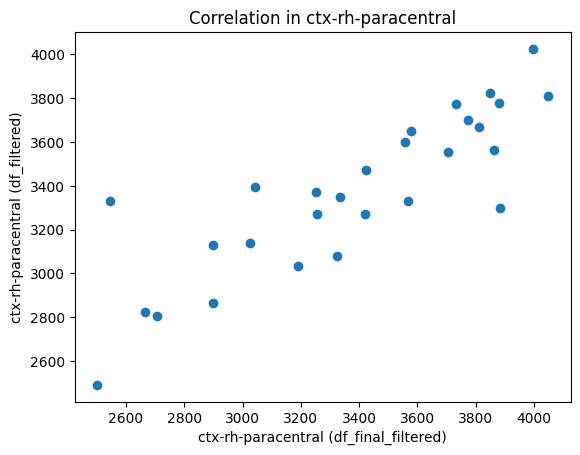


Correlation in ctx-rh-parahippocampal: 0.8867206899120801


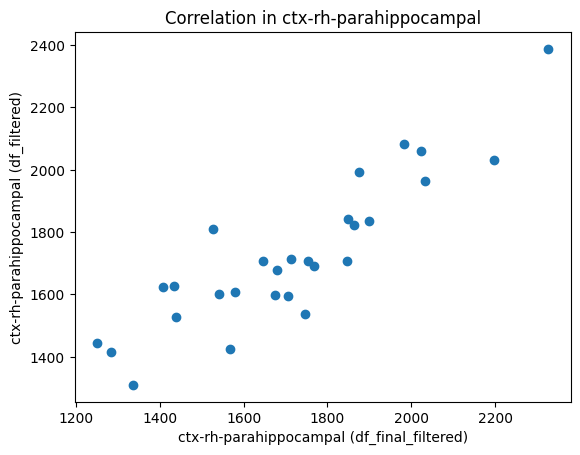


Correlation in ctx-rh-parsopercularis: 0.8583615140175059


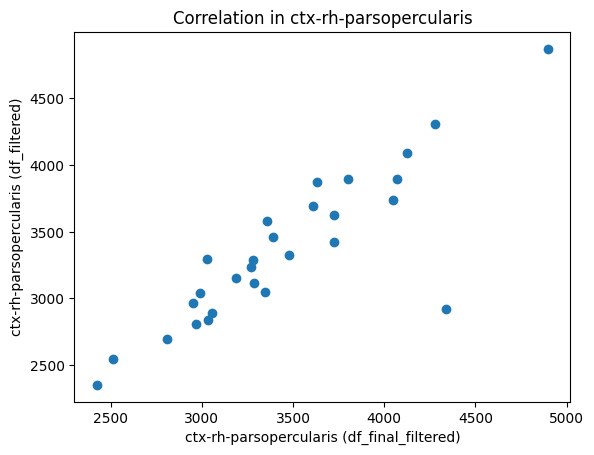


Correlation in ctx-rh-parsorbitalis: 0.7820736755374208


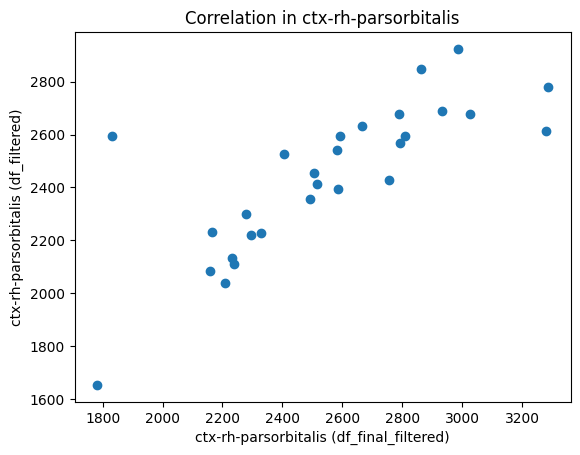


Correlation in ctx-rh-parstriangularis: 0.8019656080628605


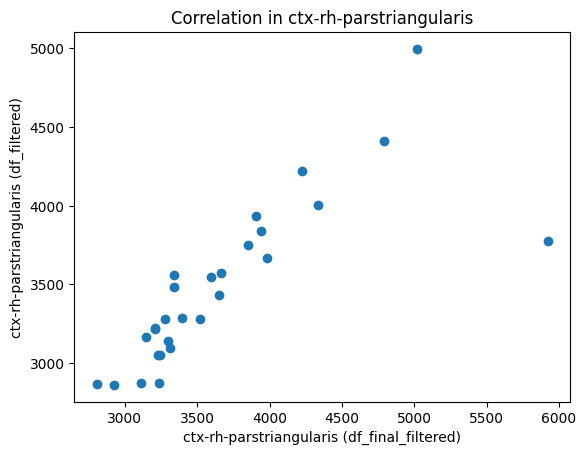


Correlation in ctx-rh-pericalcarine: 0.9174906659430457


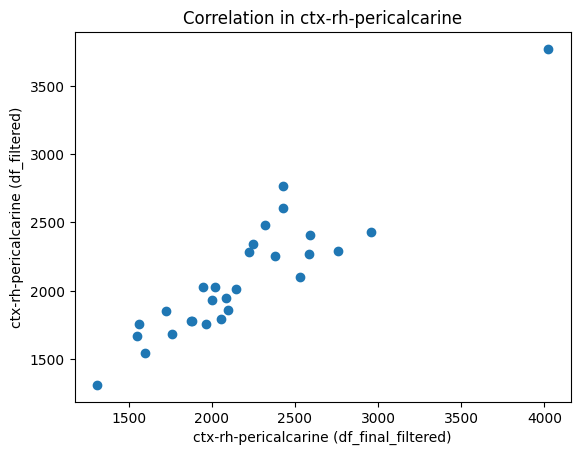


Correlation in ctx-rh-postcentral: 0.8901132700971258


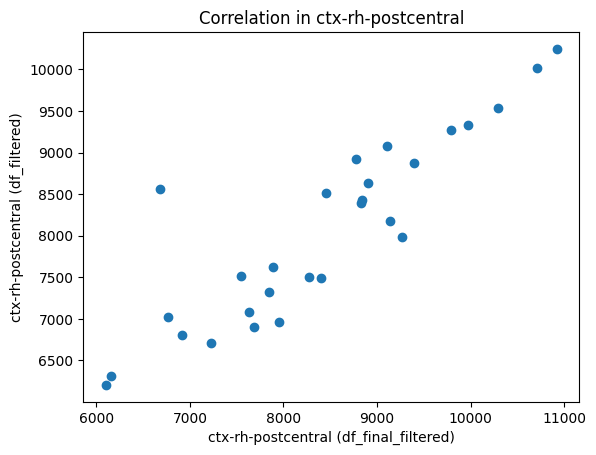


Correlation in ctx-rh-posteriorcingulate: 0.9738981192521815


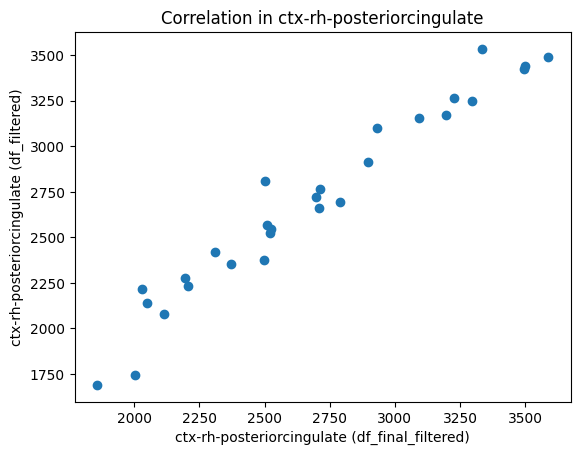


Correlation in ctx-rh-precentral: 0.6995741095620551


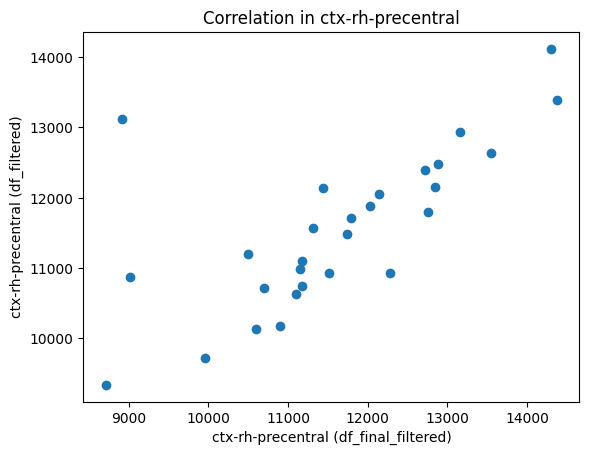


Correlation in ctx-rh-precuneus: 0.6541864738013348


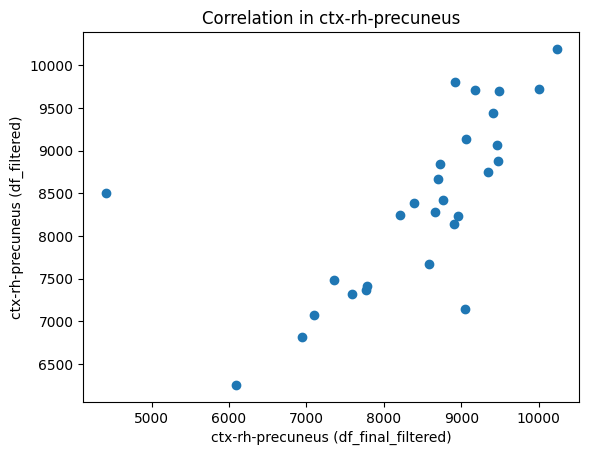


Correlation in ctx-rh-rostralanteriorcingulate: 0.9584979130850821


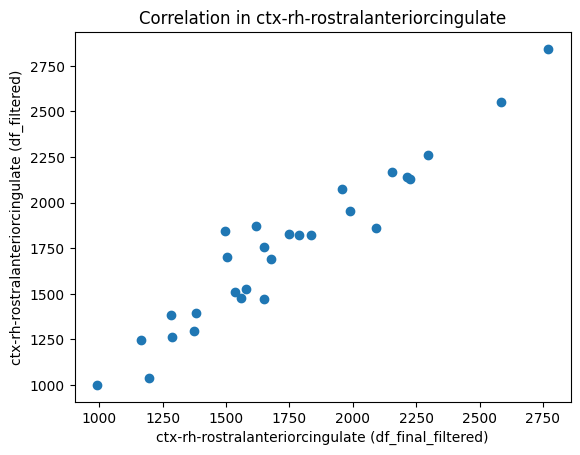


Correlation in ctx-rh-rostralmiddlefrontal: 0.6338677493995873


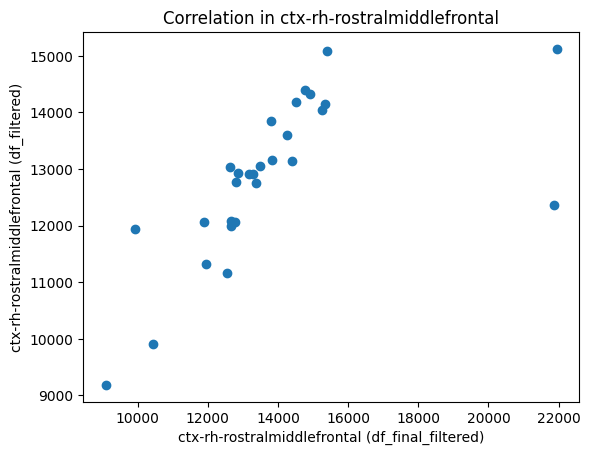


Correlation in ctx-rh-superiorfrontal: 0.7251313539582144


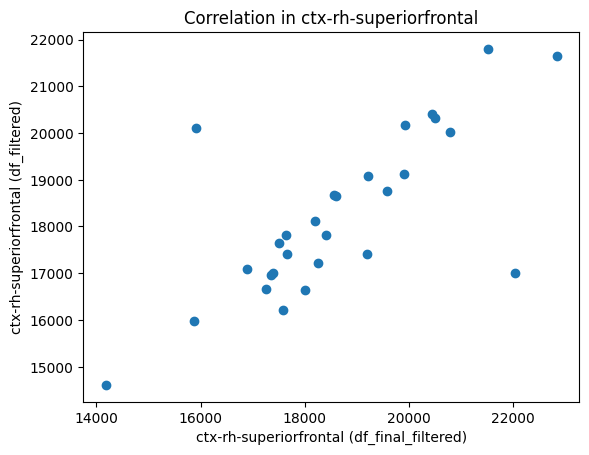


Correlation in ctx-rh-superiorparietal: 0.579788361453057


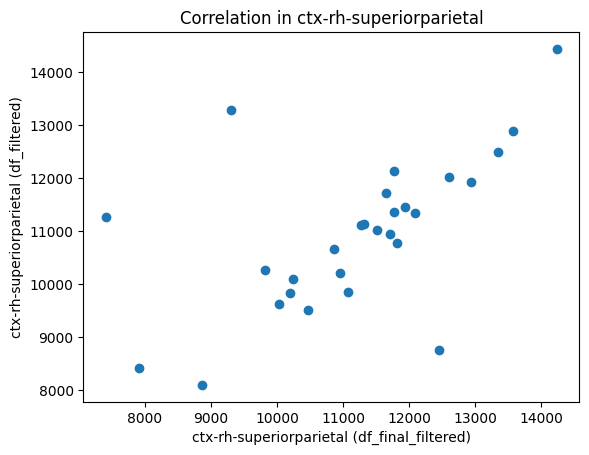


Correlation in ctx-rh-superiortemporal: 0.9535864416493347


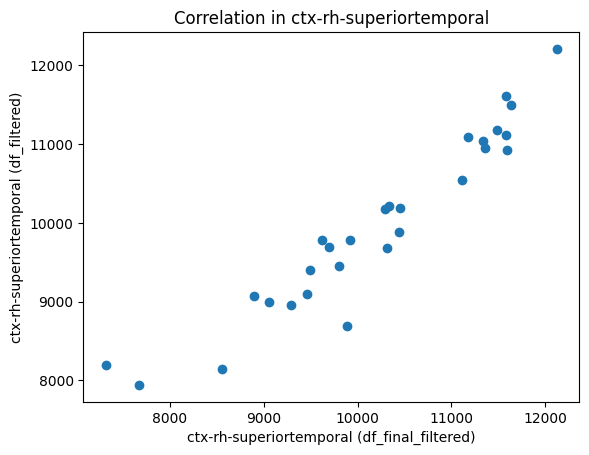


Correlation in ctx-rh-supramarginal: 0.6875535848207993


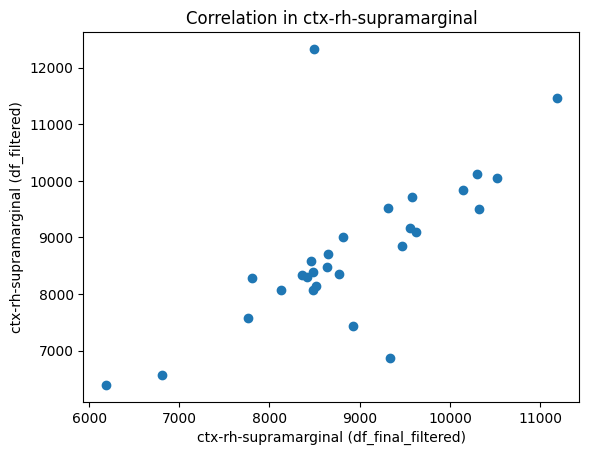


Correlation in ctx-rh-temporalpole: 0.8816231099144727


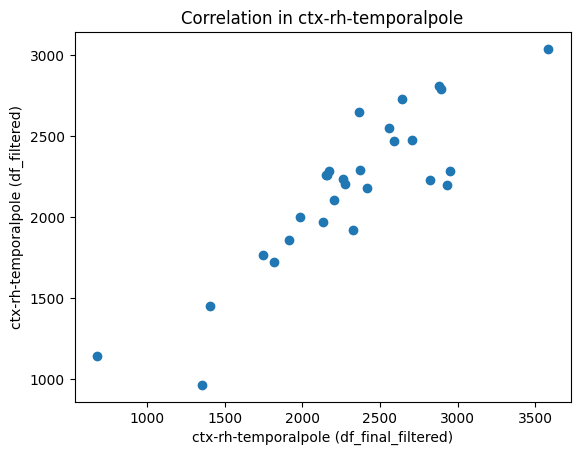


Correlation in ctx-rh-transversetemporal: 0.9343156424001259


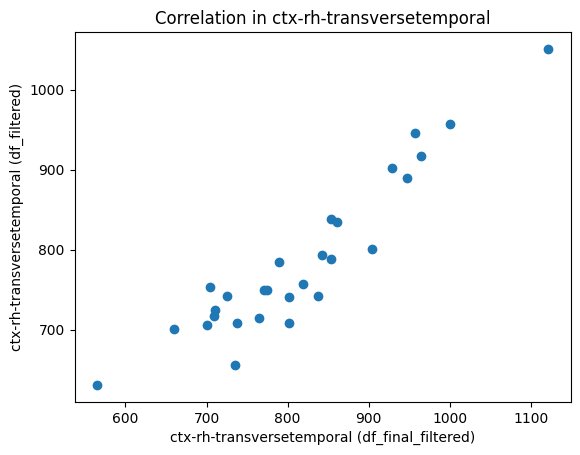


Correlation in ctx-lh-insula: 0.94058231545473


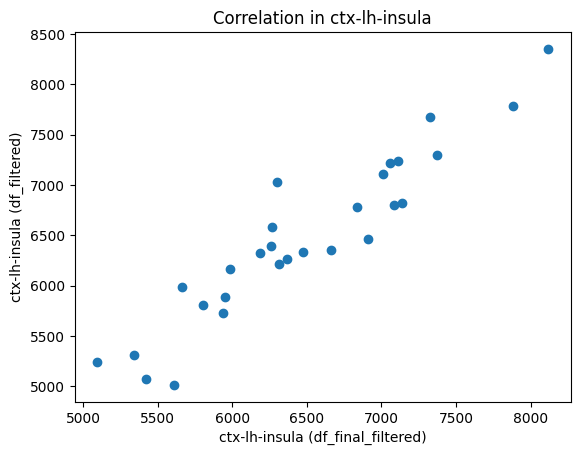


Correlation in ctx-rh-insula: 0.8487287053092358


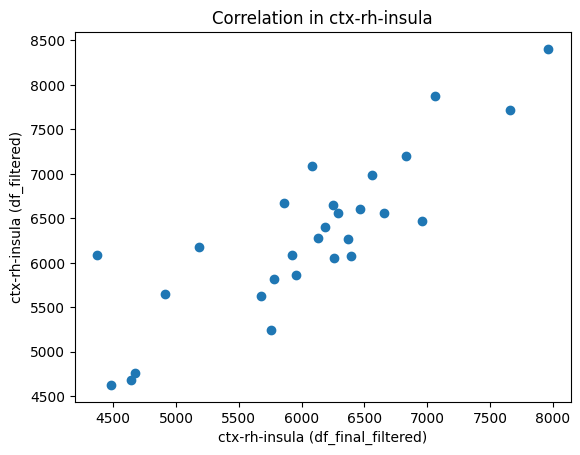


Correlation in ctx-lh-bankssts: 0.9644224810577207


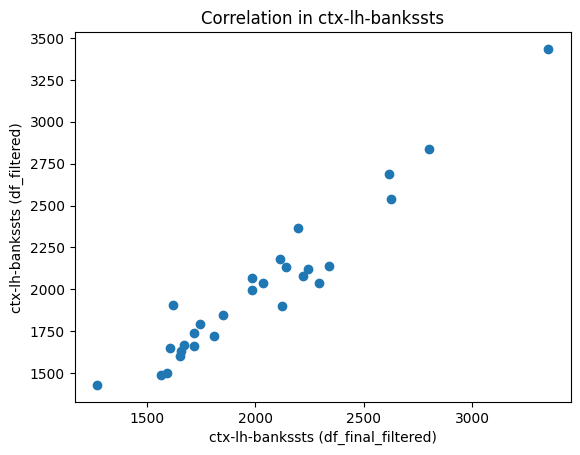


Correlation in ctx-lh-caudalanteriorcingulate: 0.9358037690631391


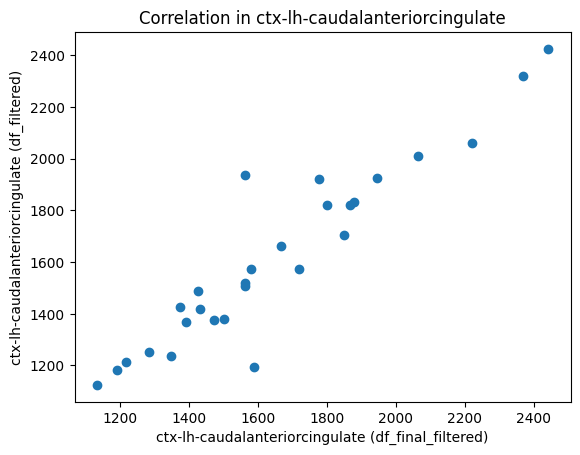


Correlation in ctx-lh-caudalmiddlefrontal: 0.9792582714489293


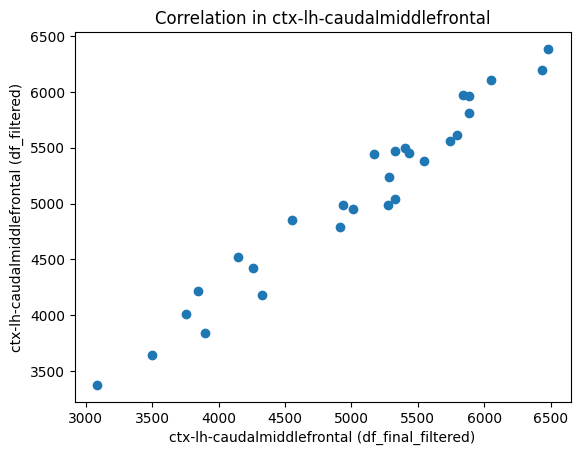


Correlation in ctx-lh-cuneus: 0.9502609843741211


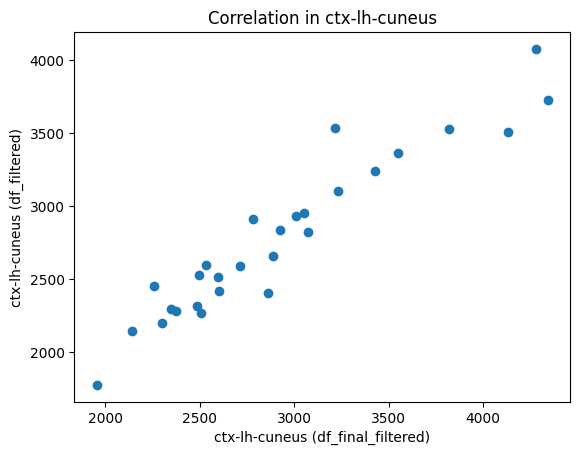


Correlation in ctx-lh-entorhinal: 0.8876628506144618


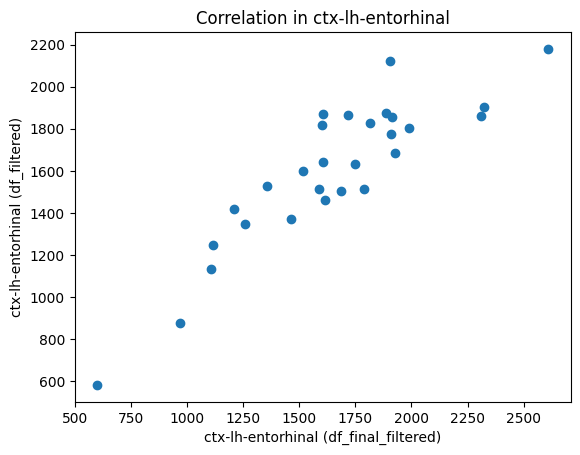


Correlation in ctx-lh-frontalpole: 0.4169913119238533


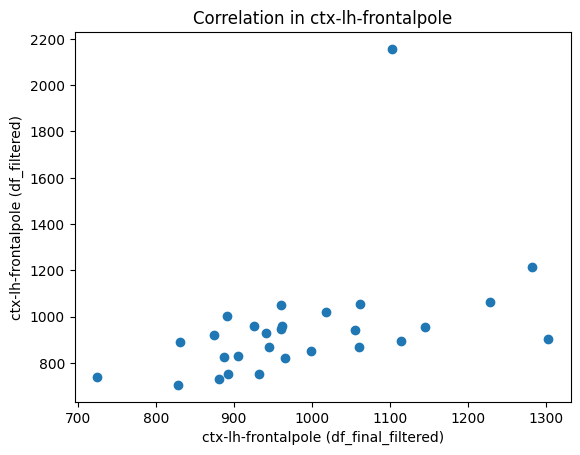


Correlation in ctx-lh-fusiform: 0.9768537849830307


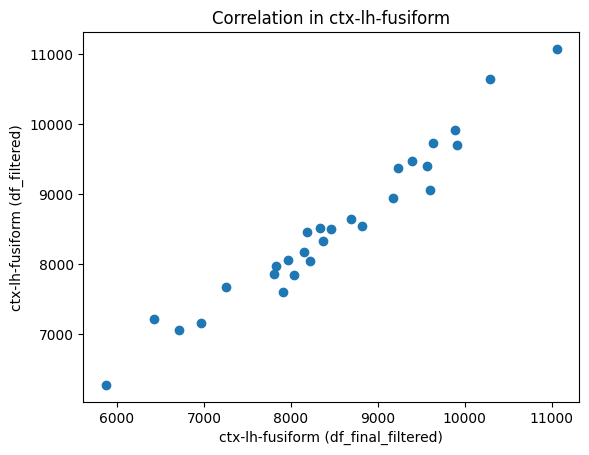


Correlation in ctx-lh-inferiorparietal: 0.9710682690417988


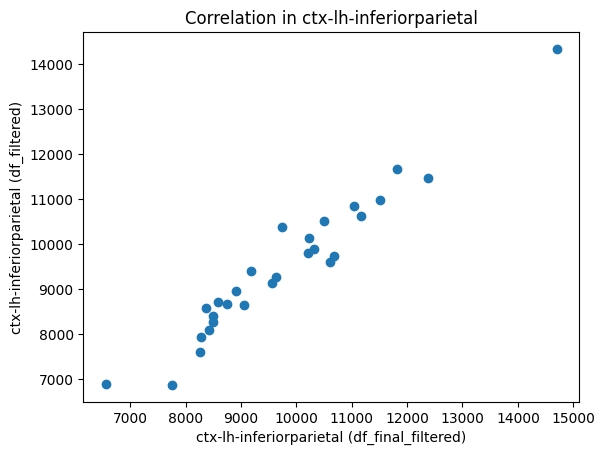


Correlation in ctx-lh-inferiortemporal: 0.9700116219163373


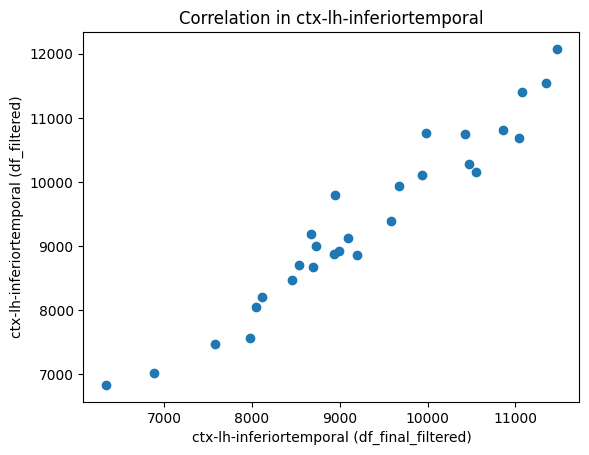


Correlation in ctx-lh-isthmuscingulate: 0.9560355621083744


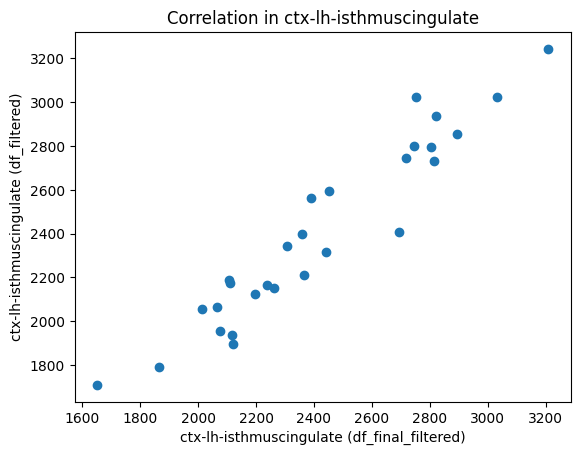


Correlation in ctx-lh-lateraloccipital: 0.9515360936601363


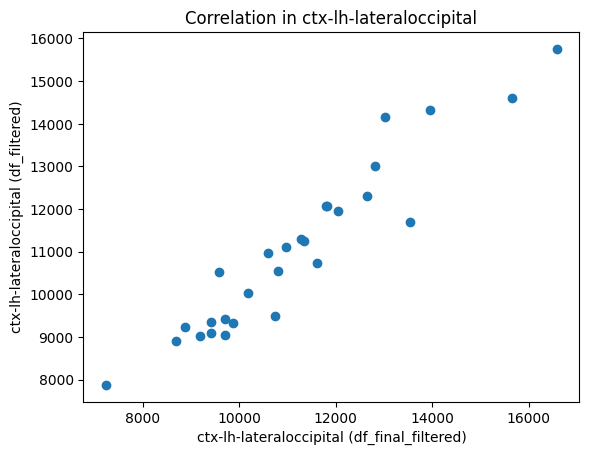


Correlation in ctx-lh-lateralorbitofrontal: 0.9616236408888411


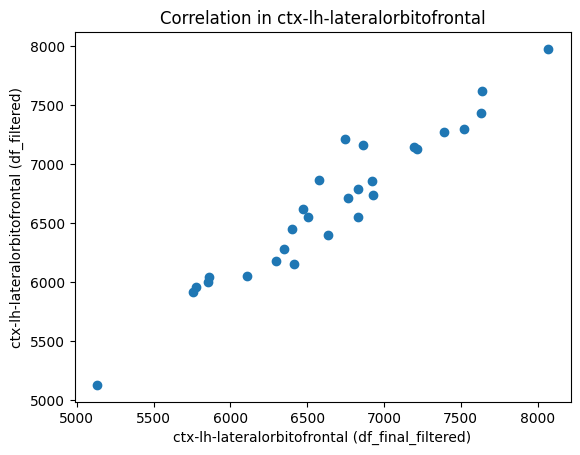


Correlation in ctx-lh-lingual: 0.9735108458534968


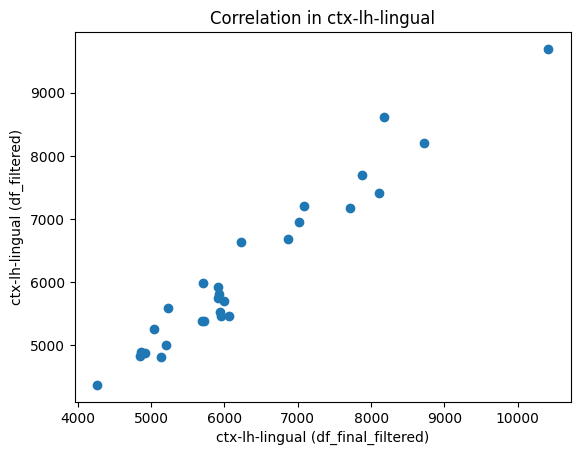


Correlation in ctx-lh-medialorbitofrontal: 0.8310681500998757


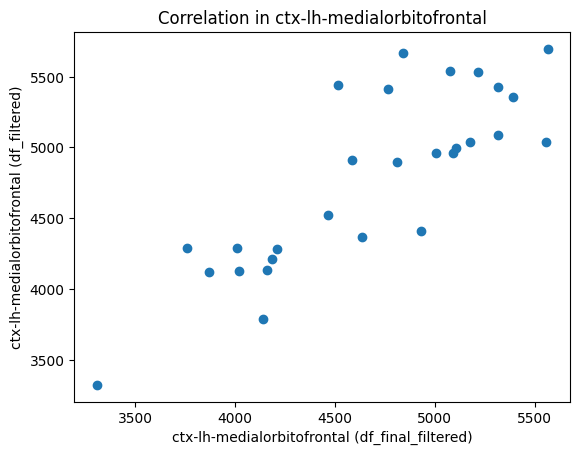


Correlation in ctx-lh-middletemporal: 0.9547275511402686


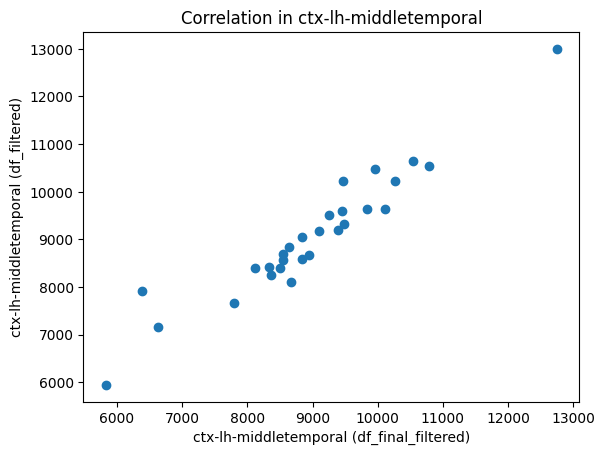


Correlation in ctx-lh-paracentral: 0.90143143396599


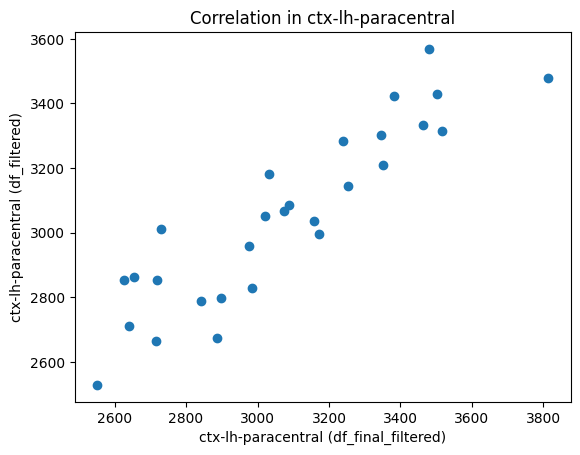


Correlation in ctx-lh-parahippocampal: 0.9310488723647483


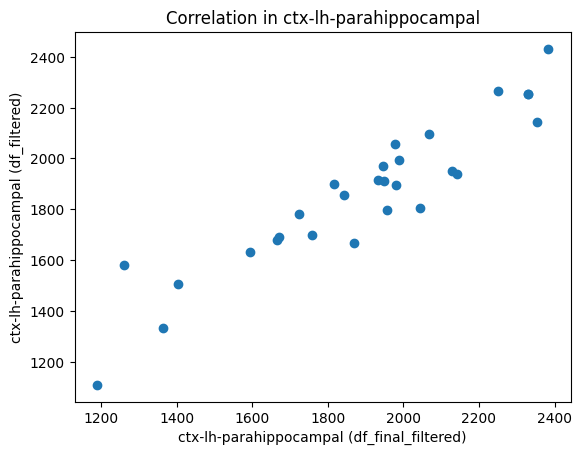


Correlation in ctx-lh-parsopercularis: 0.9701688778111075


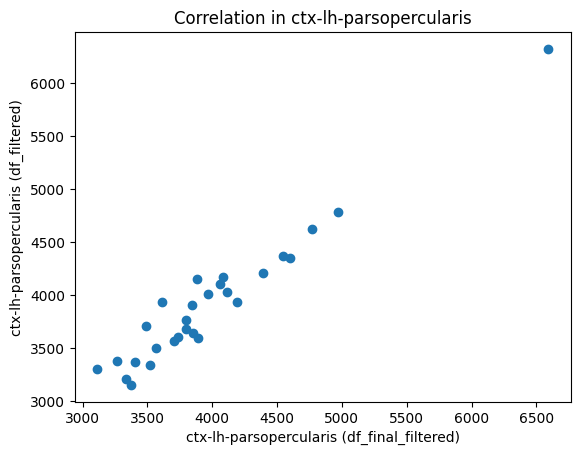


Correlation in ctx-lh-parsorbitalis: 0.6436343316845162


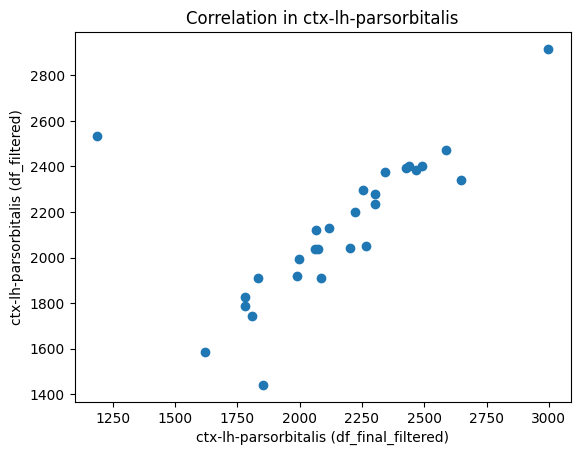


Correlation in ctx-lh-parstriangularis: 0.9352974871608561


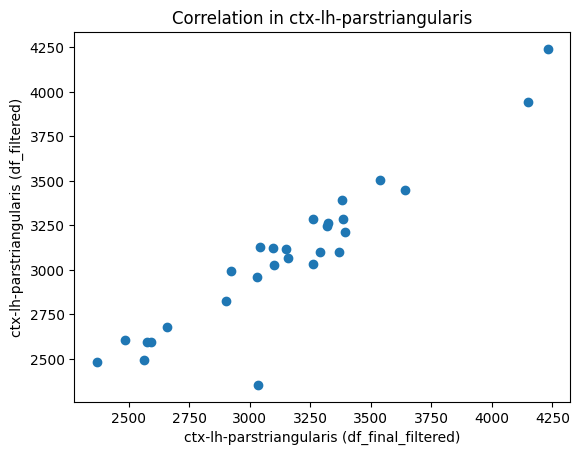


Correlation in ctx-lh-pericalcarine: 0.8976710395676794


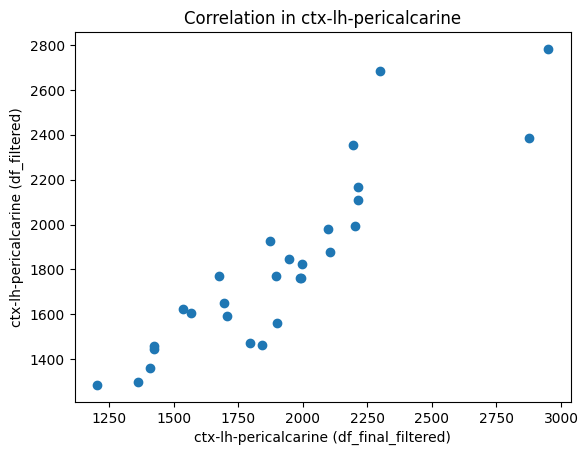


Correlation in ctx-lh-postcentral: 0.9662279406015591


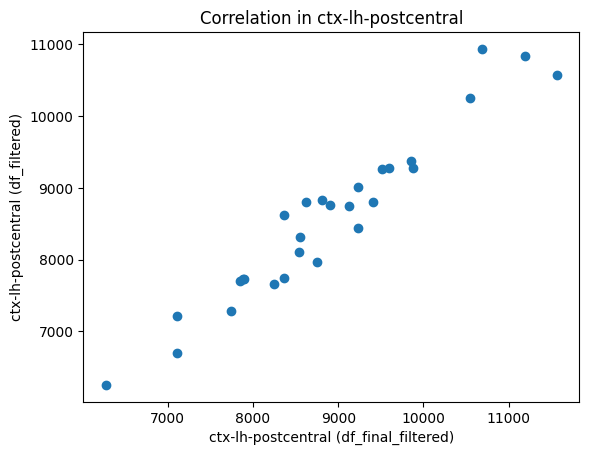


Correlation in ctx-lh-posteriorcingulate: 0.9424861956530945


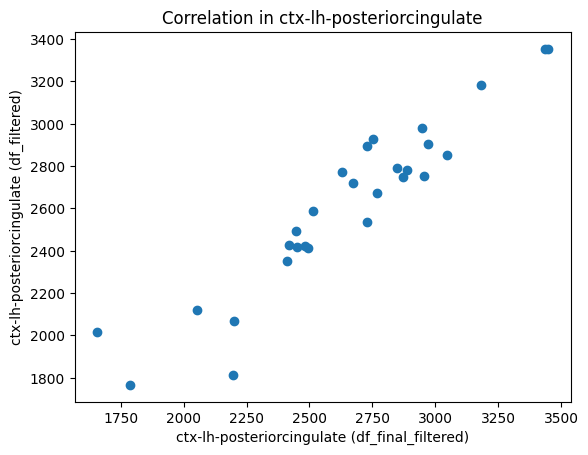


Correlation in ctx-lh-precentral: 0.9542886703268489


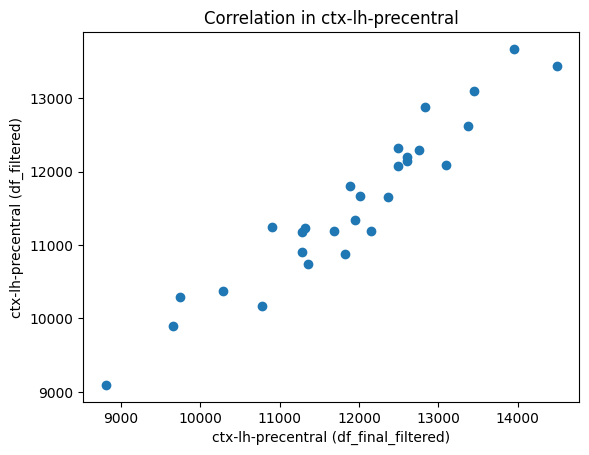


Correlation in ctx-lh-precuneus: 0.951881598280186


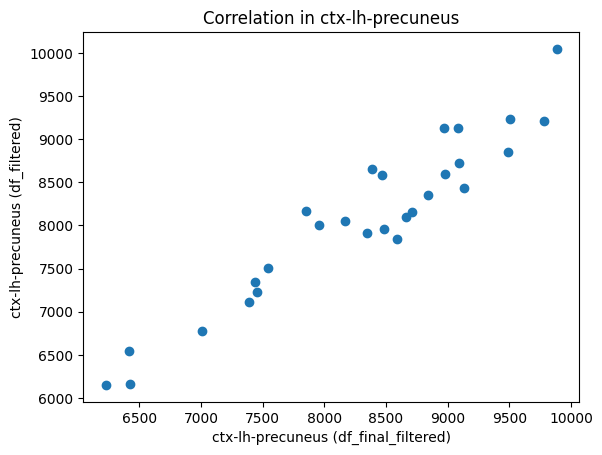


Correlation in ctx-lh-rostralanteriorcingulate: 0.6960799823698671


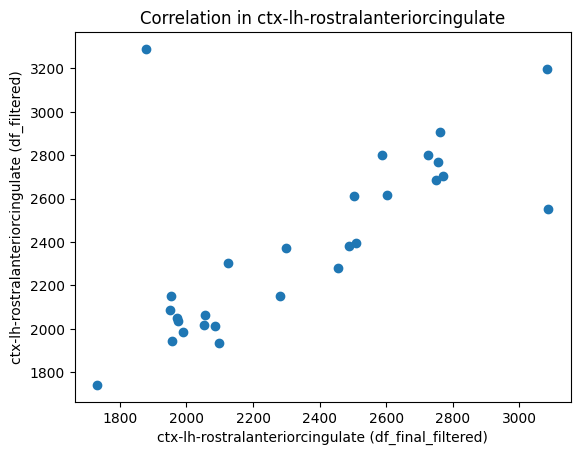


Correlation in ctx-lh-rostralmiddlefrontal: 0.9578302859045746


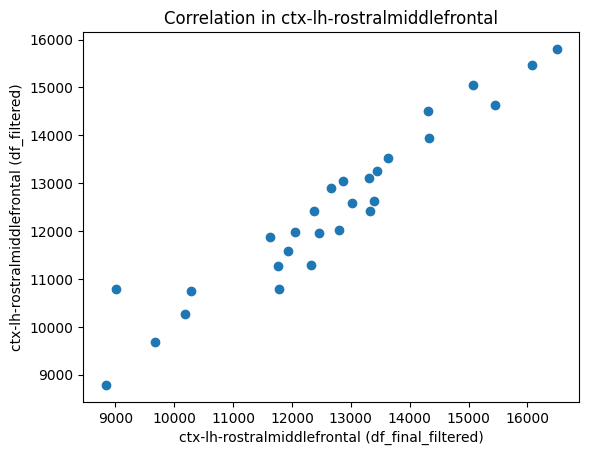


Correlation in ctx-lh-superiorfrontal: 0.9461742832192498


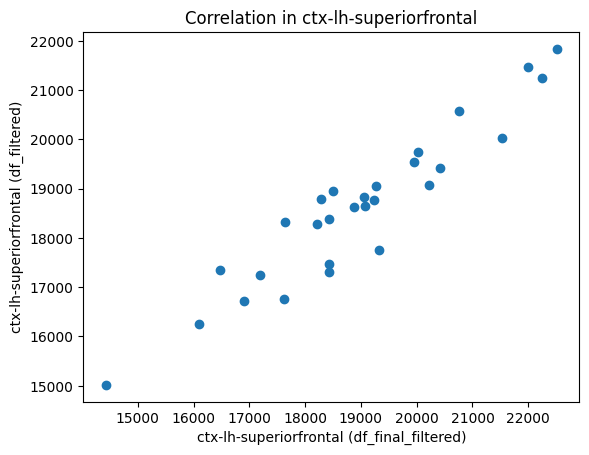


Correlation in ctx-lh-superiorparietal: 0.9584367817507771


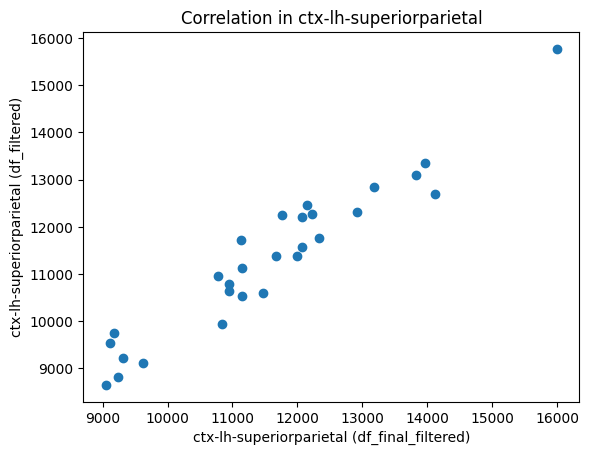


Correlation in ctx-lh-superiortemporal: 0.9705951736103583


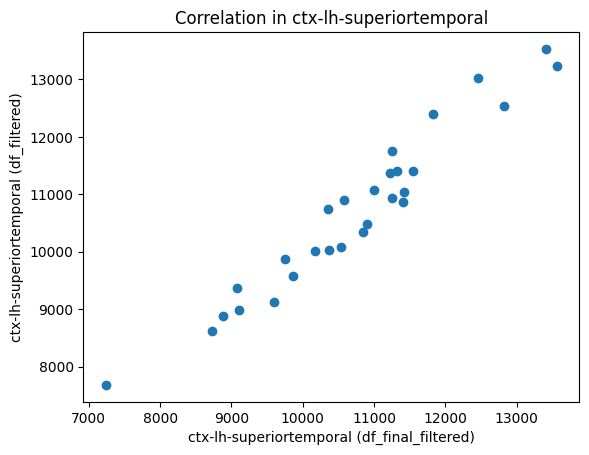


Correlation in ctx-lh-supramarginal: 0.9643985223241692


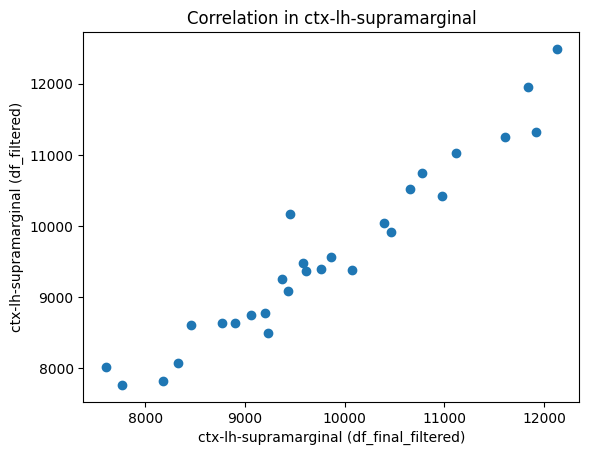


Correlation in ctx-lh-temporalpole: 0.8201012378714934


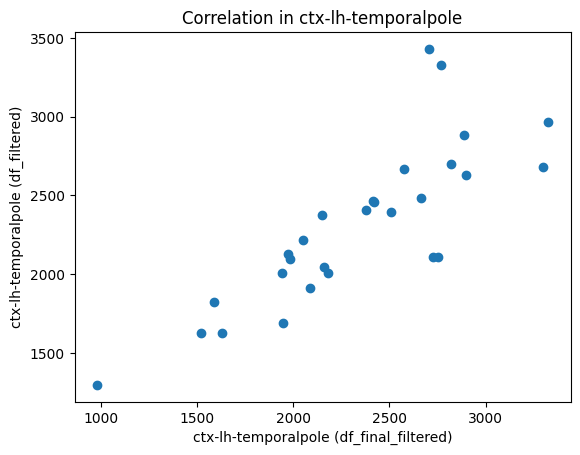


Correlation in ctx-lh-transversetemporal: 0.9403570410741926


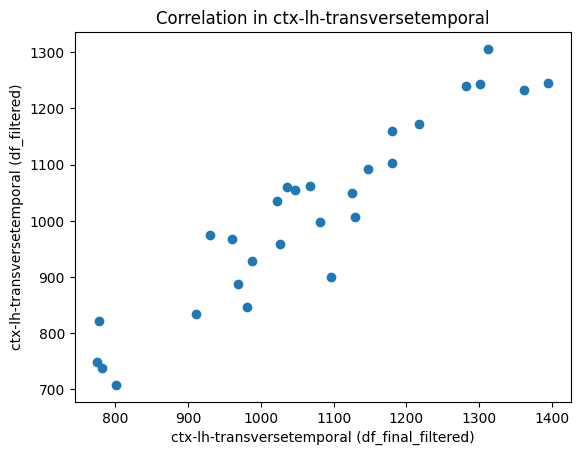


Correlation in ctx-rh-bankssts: 0.9214818544088854


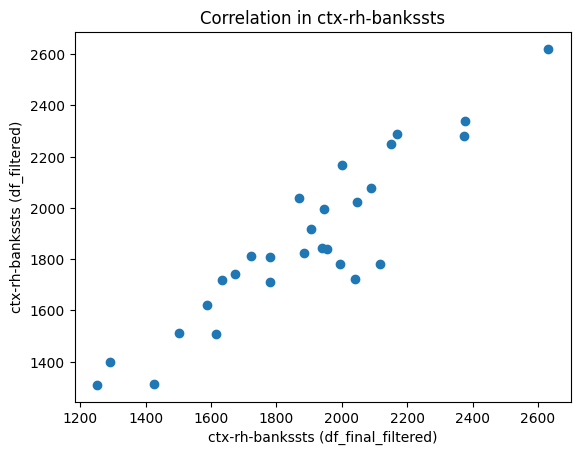


Correlation in ctx-rh-caudalanteriorcingulate: 0.922244980103616


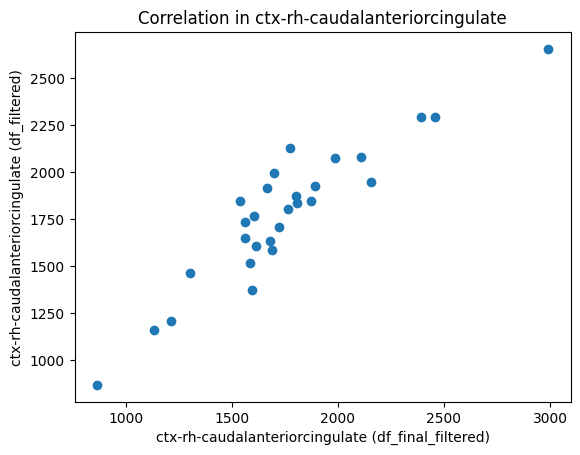


Correlation in ctx-rh-caudalmiddlefrontal: 0.5213075861917656


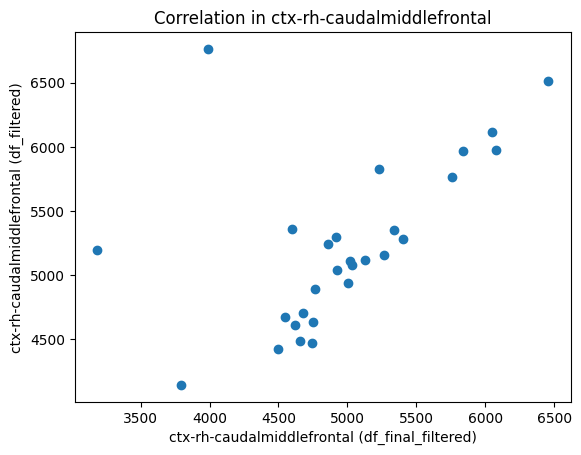


Correlation in ctx-rh-cuneus: 0.921017054751318


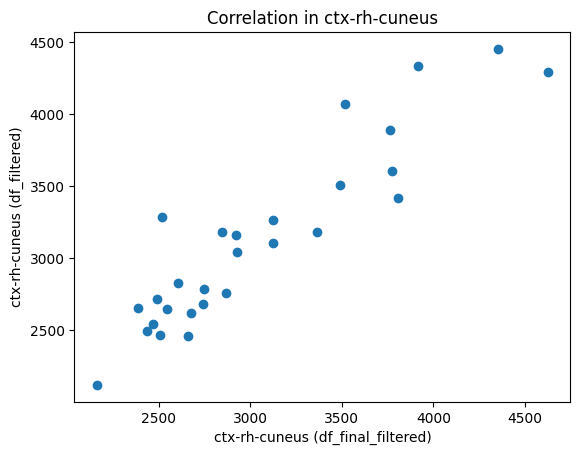


Correlation in ctx-rh-entorhinal: 0.9654907494439546


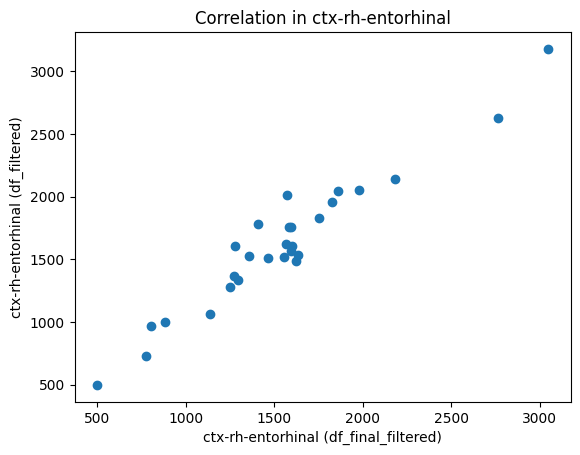


Correlation in ctx-rh-frontalpole: 0.7020807473247445


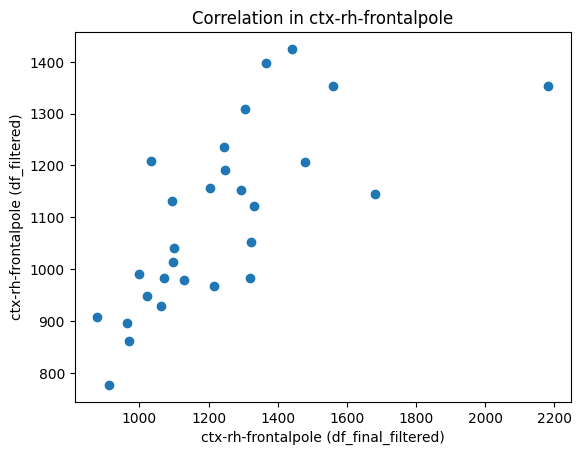


Correlation in ctx-rh-fusiform: 0.9507320578447451


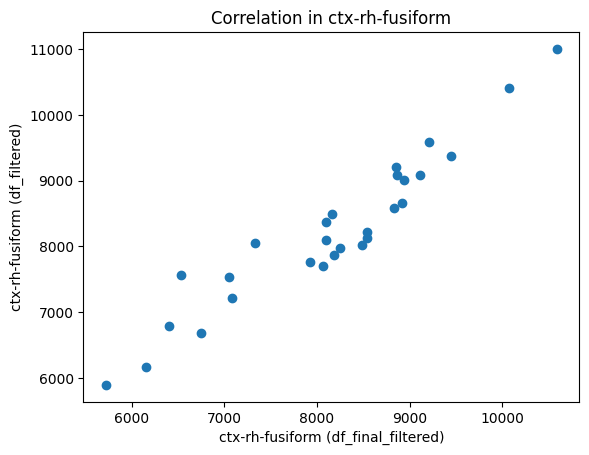


Correlation in ctx-rh-inferiorparietal: 0.9493134467774192


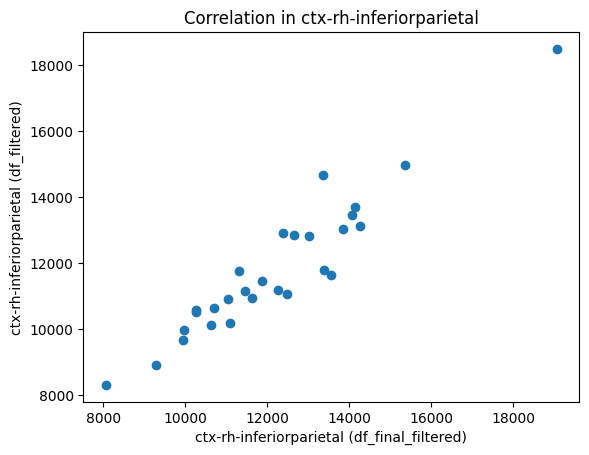


Correlation in ctx-rh-inferiortemporal: 0.9635813890152074


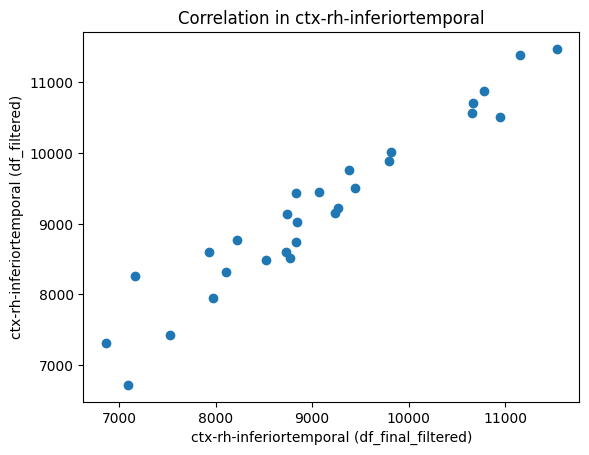


Correlation in ctx-rh-isthmuscingulate: 0.8645081437327968


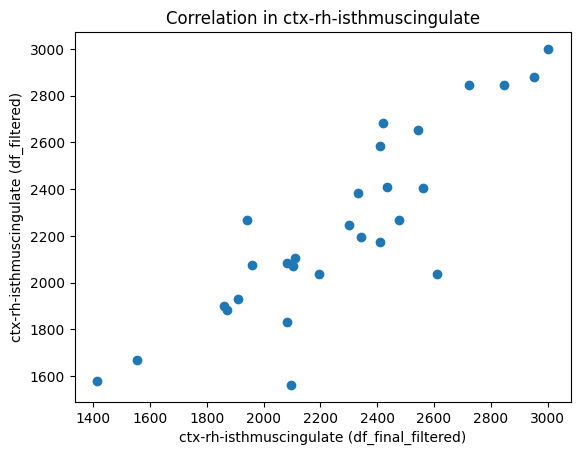


Correlation in ctx-rh-lateraloccipital: 0.9724916458194798


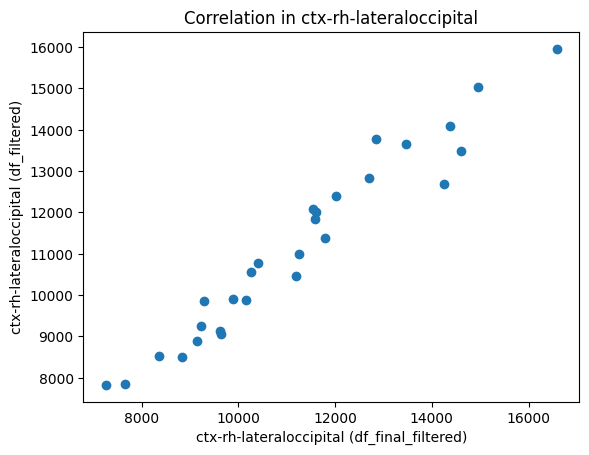


Correlation in ctx-rh-lateralorbitofrontal: 0.747053592823674


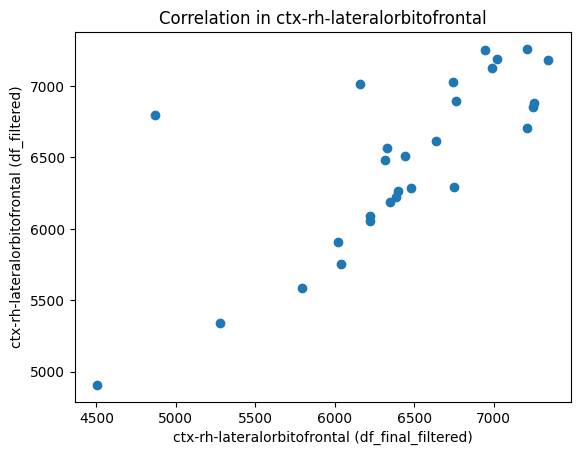


Correlation in ctx-rh-lingual: 0.9503315872598679


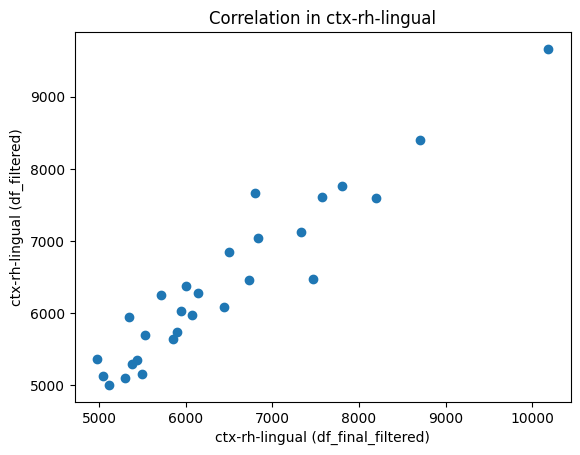


Correlation in ctx-rh-medialorbitofrontal: 0.649491293280223


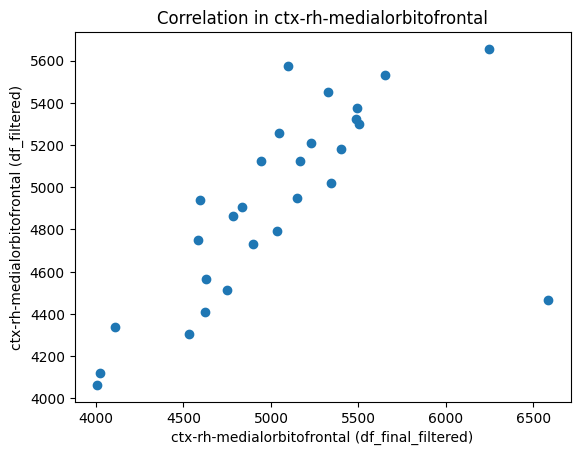


Correlation in ctx-rh-middletemporal: 0.970989311929708


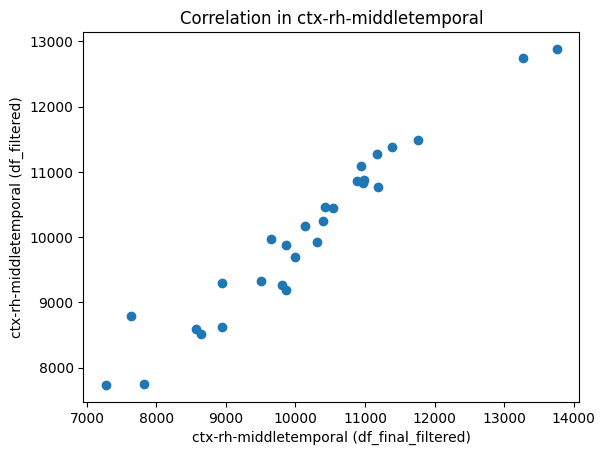


Table of correlations:
                      Structure  Correlation
0            ctx-rh-paracentral     0.851971
1        ctx-rh-parahippocampal     0.886721
2        ctx-rh-parsopercularis     0.858362
3          ctx-rh-parsorbitalis     0.782074
4       ctx-rh-parstriangularis     0.801966
..                          ...          ...
63      ctx-rh-lateraloccipital     0.972492
64  ctx-rh-lateralorbitofrontal     0.747054
65               ctx-rh-lingual     0.950332
66   ctx-rh-medialorbitofrontal     0.649491
67        ctx-rh-middletemporal     0.970989

[68 rows x 2 columns]


In [9]:
df_filtered = df_filtered.set_index("PTID")

common_columns = df_final_filtered.columns.intersection(df_filtered.columns)

df_final_filtered = df_final_filtered[common_columns]
df_filtered = df_filtered[common_columns]

df_final_filtered = df_final_filtered.loc[df_filtered.index]
df_filtered = df_filtered.loc[df_final_filtered.index]

correlation_results = []

for col in common_columns:
    df_col_final = df_final_filtered[col].astype(float)
    df_col_filtered = df_filtered[col].astype(float)

    if df_col_final.nunique() > 1 and df_col_filtered.nunique() > 1:
        correlation_value = df_col_final.corr(df_col_filtered)
    else:
        correlation_value = None

    correlation_results.append((col, correlation_value))

    print(f"\n=============================")
    print(f"Correlation in {col}: {correlation_value}")
    print("=============================")

    if correlation_value is not None:
        plt.scatter(df_col_final, df_col_filtered)
        plt.xlabel(f'{col} (df_final_filtered)')
        plt.ylabel(f'{col} (df_filtered)')
        plt.title(f'Correlation in {col}')
        plt.show()

df_correlation_results = pd.DataFrame(correlation_results, columns=['Structure', 'Correlation'])
print("\nTable of correlations:")
print(df_correlation_results)

In [10]:
df_correlation_results_sorted = df_correlation_results.sort_values(by="Correlation", ascending=False)

df_original_shape_VoxelVolume =  df_correlation_results_sorted

df_original_shape_VoxelVolume

Structure  Correlation
22   ctx-lh-caudalmiddlefrontal     0.979258
26              ctx-lh-fusiform     0.976854
7     ctx-rh-posteriorcingulate     0.973898
32               ctx-lh-lingual     0.973511
63      ctx-rh-lateraloccipital     0.972492
..                          ...          ...
38         ctx-lh-parsorbitalis     0.643634
11  ctx-rh-rostralmiddlefrontal     0.633868
13      ctx-rh-superiorparietal     0.579788
55   ctx-rh-caudalmiddlefrontal     0.521308
25           ctx-lh-frontalpole     0.416991

[68 rows x 2 columns]

###original_shape_MeshVolume

In [11]:
df_final = None

for file in csv_files:
    df = pd.read_csv(file, usecols=['StructName', 'original_shape_MeshVolume'])

    df.set_index('StructName', inplace=True)

    column_name = file.split('/')[-1].replace('_features.csv', '')
    df.columns = [column_name]

    if df_final is None:
        df_final = df
    else:
        df_final = df_final.join(df, how='outer')

df_final = df_final.T
df_final

StructName  3rd-Ventricle  4th-Ventricle    Brain-Stem  CC_Anterior  \
031_S_0830    1985.333333    1170.083333  19660.250000   972.041667   
006_S_4363    1296.458333    1235.958333  19166.583333  1042.000000   
128_S_2130    3902.625000    2963.750000  23954.416667   644.583333   
072_S_4462    2808.291667    1686.625000  21471.666667   904.625000   
137_S_0972    2361.375000    2244.583333  20575.916667   823.208333   
099_S_4157    1828.000000    1287.125000  18055.750000   834.208333   
032_S_4823    2030.625000    1254.208333  16851.666667   660.458333   
130_S_2373    1122.875000     794.958333  17367.333333   764.958333   
041_S_4720    1299.041667    1673.041667  22372.041667  1044.291667   
137_S_4623    1303.625000    1176.666667  20772.625000   923.833333   
013_S_1186    1844.500000    1680.583333  23921.708333   824.625000   
002_S_4521    1236.875000    1674.666667  22680.958333   983.875000   
137_S_4631    1787.583333    2452.333333  23084.166667  1056.916667   
036_S_4714     960.291667    1231.166667  21321.833333   916.458333   
035_S_4114    1741.166667    2459.208333  20884.166667  1126.291667   
141_S_2210    2708.416667    2380.083333  18521.458333   922.708333   
041_S_4143    1803.750000    1629.541667  19108.750000   818.250000   
011_S_4893    1843.666667    1198.416667  20214.666667   827.125000   
114_S_5047    1404.708333    2074.500000  22703.250000   851.791667   
002_S_1268    2623.333333    2091.833333  21993.125000  1252.458333   
041_S_4138    2768.208333    1285.333333  16651.500000   548.750000   
037_S_4030    1674.208333    1626.583333  22035.125000  1213.958333   
035_S_4582    1423.000000    1438.541667  19657.166667   993.625000   
002_S_4746    2794.750000    1743.250000  24966.000000   779.583333   
022_S_2087    2015.416667    1336.666667  22494.625000   748.416667   
130_S_2403    1785.458333    1844.500000  20740.083333   921.916667   
067_S_2195    1954.916667    1327.666667  21683.250000   939.750000   
137_S_4331    3160.833333    3615.375000  20107.916667   950.375000   

StructName  CC_Central  CC_Mid_Anterior  CC_Mid_Posterior  CC_Posterior  \
031_S_0830  593.083333       588.583333        563.458333   1310.125000   
006_S_4363  504.000000       504.750000        503.958333   1329.166667   
128_S_2130  387.041667       359.791667        462.333333    825.583333   
072_S_4462  437.708333       410.333333        314.041667   1116.625000   
137_S_0972  497.875000       412.958333        522.166667    932.666667   
099_S_4157  370.166667       346.375000        445.291667   1104.416667   
032_S_4823  361.916667       302.666667        449.250000   1041.791667   
130_S_2373  404.541667       408.750000        442.625000    821.291667   
041_S_4720  448.416667       482.375000        548.458333   1027.916667   
137_S_4623  445.166667       485.750000        507.041667    956.250000   
013_S_1186  398.375000       472.958333        545.083333   1132.416667   
002_S_4521  530.458333       470.666667        630.416667   1039.041667   
137_S_4631  450.291667       441.958333        493.625000   1051.708333   
036_S_4714  442.750000       474.666667        552.208333   1001.666667   
035_S_4114  525.958333       520.875000        594.666667   1278.791667   
141_S_2210  368.833333       343.416667        439.375000   1022.500000   
041_S_4143  410.208333       385.125000        351.875000   1103.041667   
011_S_4893  387.833333       328.458333        440.500000    986.666667   
114_S_5047  428.541667       414.458333        341.125000    976.250000   
002_S_1268  543.875000       428.375000        484.000000   1153.583333   
041_S_4138  383.666667       298.125000        332.375000    988.000000   
037_S_4030  589.583333       560.208333        477.000000   1295.291667   
035_S_4582  438.041667       509.583333        449.041667   1224.583333   
002_S_4746  402.791667       514.416667        610.291667   1035.125000   
022_S_2087  494.083333       731.041667        666.083333   1090.

In [12]:
df_final_filtered = df_final[df_filtered.columns.intersection(df_final.columns)]

df_final_filtered

StructName  ctx-rh-paracentral  ctx-rh-parahippocampal  \
031_S_0830         3341.791667             1236.958333   
006_S_4363         2612.541667             1745.666667   
128_S_2130         3838.458333             1669.458333   
072_S_4462         3947.541667             2307.416667   
137_S_0972         3692.791667             1826.666667   
099_S_4157         2661.541667             1298.291667   
032_S_4823         2993.625000             1465.958333   
130_S_2373         2464.708333             1533.875000   
041_S_4720         3994.791667             1820.291667   
137_S_4623         3680.458333             1994.208333   
013_S_1186         3192.041667             1728.375000   
002_S_4521         3155.750000             2149.625000   
137_S_4631         2460.500000             1379.375000   
036_S_4714         2841.166667             1863.000000   
035_S_4114         3516.375000             1653.666667   
141_S_2210         3726.333333             1976.208333   
041_S_4143         3276.875000             1405.541667   
011_S_4893         3512.916667             1618.500000   
114_S_5047         3765.916667             1540.416667   
002_S_1268         3730.041667             1391.666667   
041_S_4138         2853.500000             1214.625000   
037_S_4030         3211.750000             1506.250000   
035_S_4582         3294.875000             1720.750000   
002_S_4746         2968.708333             1680.083333   
022_S_2087         3377.833333             1825.375000   
130_S_2403         3832.875000             1629.958333   
067_S_2195         3827.041667             1804.375000   
137_S_4331         3523.208333             1957.791667   

StructName  ctx-rh-parsopercularis  ctx-rh-parsorbitalis  \
031_S_0830             3006.583333           3217.916667   
006_S_4363             3228.583333           2147.958333   
128_S_2130             2766.333333           2578.500000   
072_S_4462             3326.833333           2884.333333   
137_S_0972             3225.125000           2250.125000   
099_S_4157             3006.208333           1741.208333   
032_S_4823             3681.625000           2777.958333   
130_S_2373             2374.750000           2114.083333   
041_S_4720             4026.583333           2787.708333   
137_S_4623             3434.958333           2756.875000   
013_S_1186             3561.125000           2535.000000   
002_S_4521             4823.208333           2945.833333   
137_S_4631             4270.000000           3247.250000   
036_S_4714             3554.166667           2468.041667   
035_S_4114             4228.166667           2195.958333   
141_S_2210             2982.000000           2981.333333   
041_S_4143             2901.416667           2534.333333   
011_S_4893             3150.250000           2613.166667   
114_S_5047             2932.416667           2268.833333   
002_S_1268             3245.500000           2761.375000   
041_S_4138             3318.791667           1796.583333   
037_S_4030             4074.208333           2445.458333   
035_S_4582             2457.000000           2712.875000   
002_S_4746             3300.500000           2184.250000   
022_S_2087             2915.250000           2371.541667   
130_S_2403             3681.666667           2180.000000   
067_S_2195             3982.375000           2219.791667   
137_S_4331             3749.041667           2440.041667   

StructName  ctx-rh-parstriangularis  ctx-rh-pericalcarine  ctx-rh-postcentral  \
031_S_0830              3604.541667           2376.541667         8408.416667   
006_S_4363              3150.750000           1412.833333         6052.541667   
128_S_2130              3356.458333           3984.333333        10947.750000   
072_S_4462              3053.208333           2439.458333         8248.500000   
137_S_0972              3800.000000           1915.416667         6956.166667   
099_S_4157              3110.958333           1210.458333         7137.125000   
032_S_482


Correlation in ctx-rh-paracentral: 0.8441105673099903


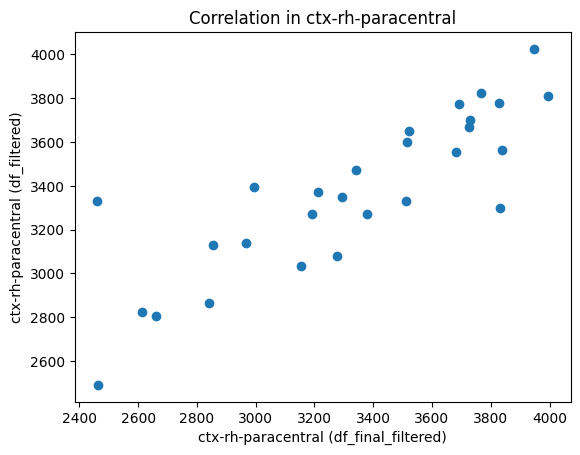


Correlation in ctx-rh-parahippocampal: 0.8831267426505


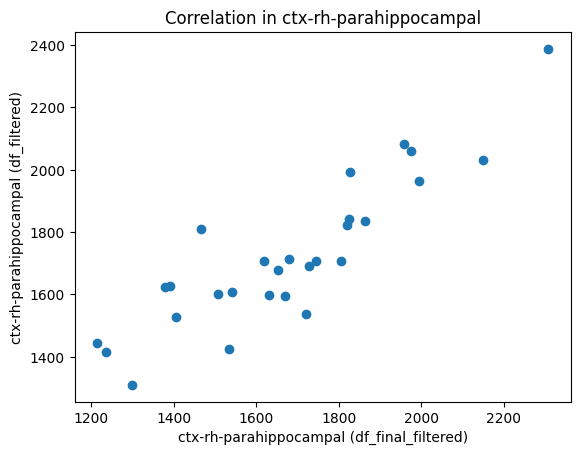


Correlation in ctx-rh-parsopercularis: 0.8596130892733794


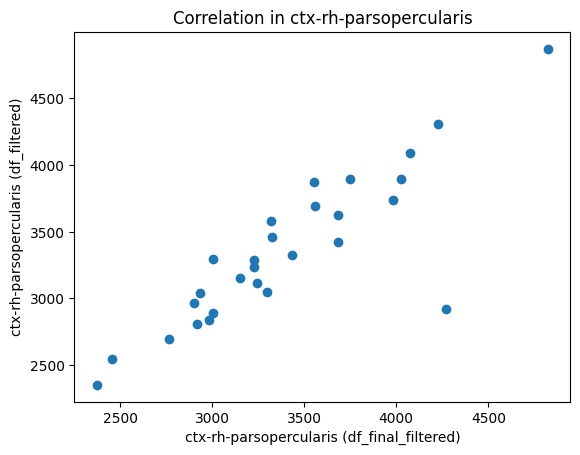


Correlation in ctx-rh-parsorbitalis: 0.7819927402419486


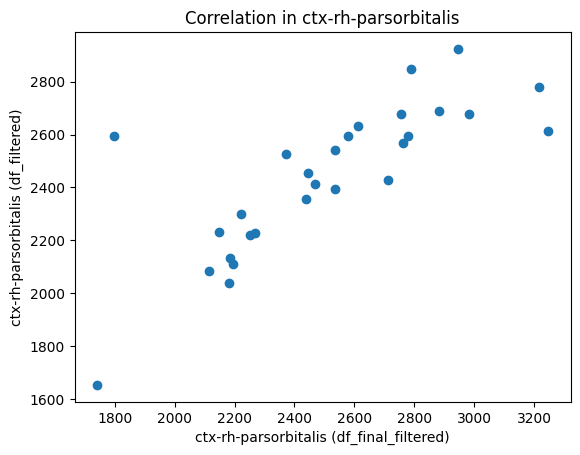


Correlation in ctx-rh-parstriangularis: 0.8026491462804138


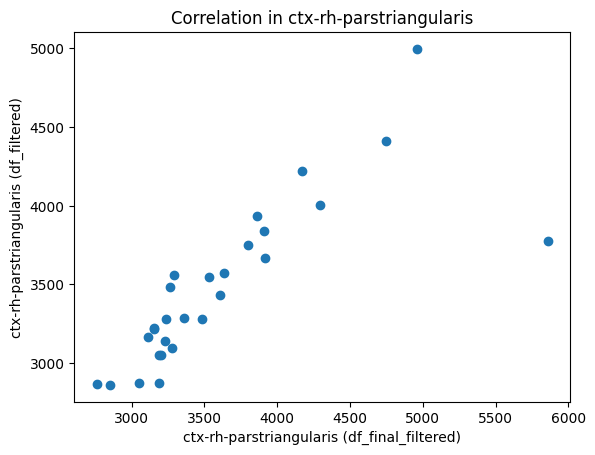


Correlation in ctx-rh-pericalcarine: 0.9158180809541633


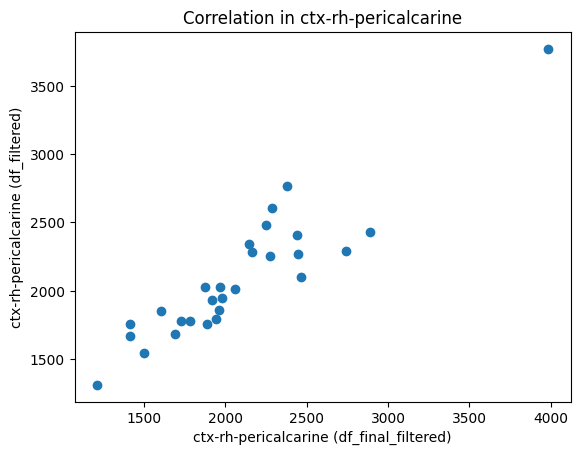


Correlation in ctx-rh-postcentral: 0.8889013708948995


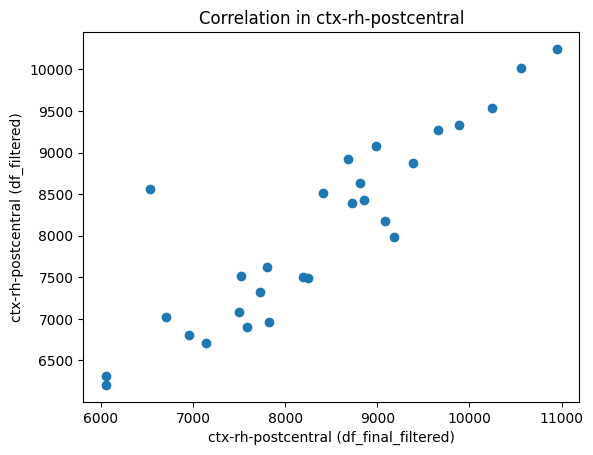


Correlation in ctx-rh-posteriorcingulate: 0.9741425768394033


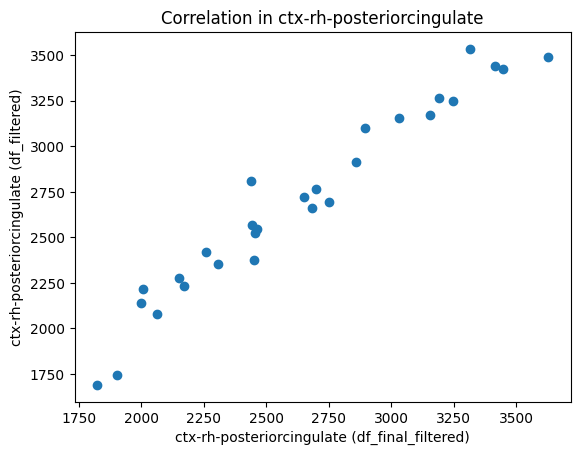


Correlation in ctx-rh-precentral: 0.7120286069520668


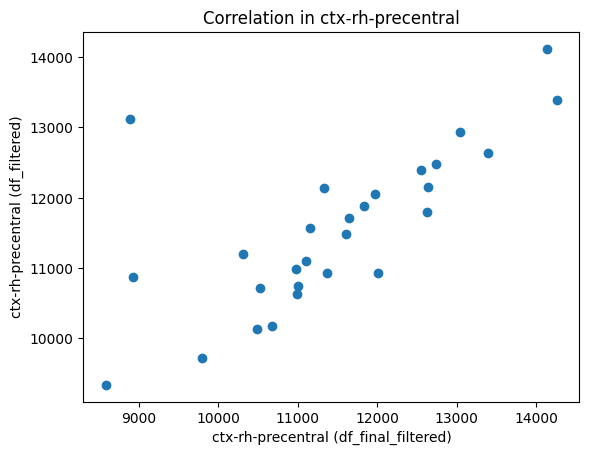


Correlation in ctx-rh-precuneus: 0.6511831609501637


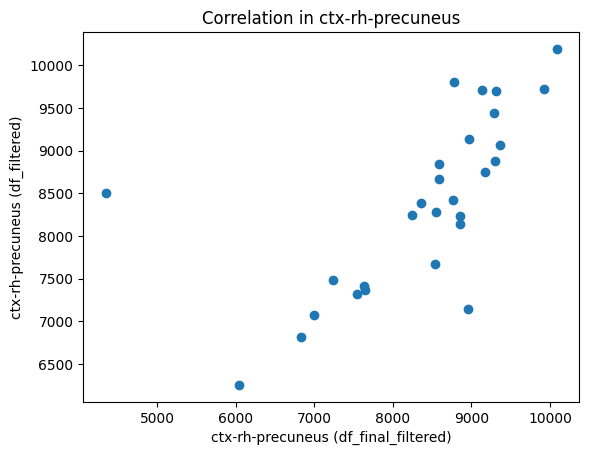


Correlation in ctx-rh-rostralanteriorcingulate: 0.9578971517309387


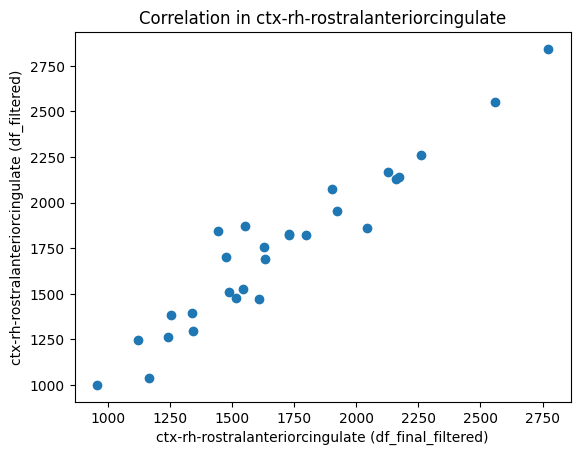


Correlation in ctx-rh-rostralmiddlefrontal: 0.6342681830593906


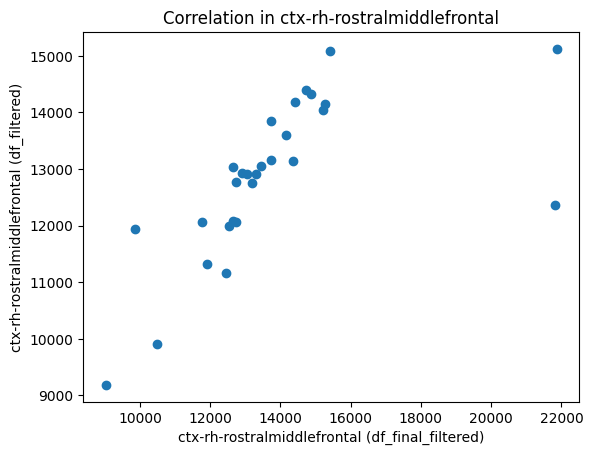


Correlation in ctx-rh-superiorfrontal: 0.7267677477058885


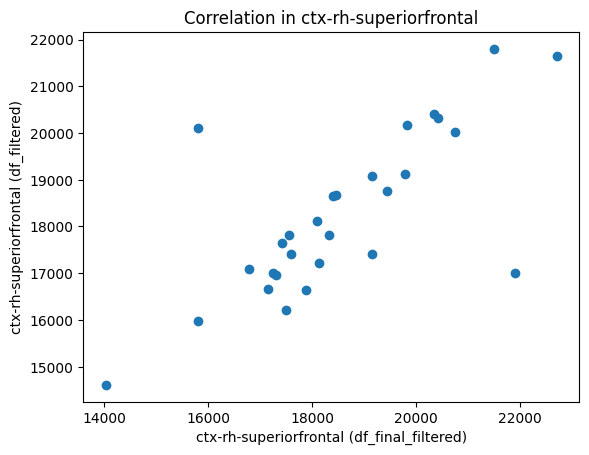


Correlation in ctx-rh-superiorparietal: 0.5814692319524885


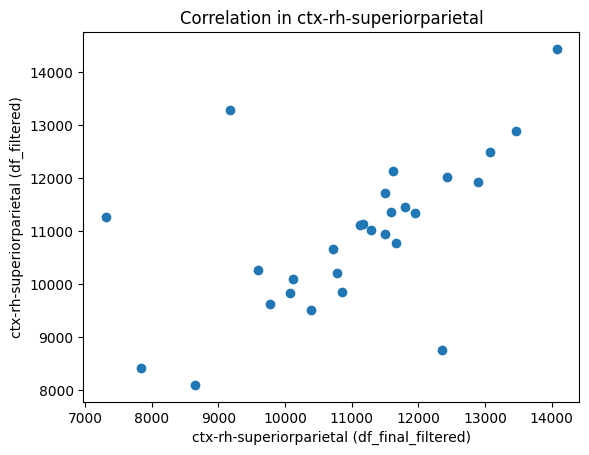


Correlation in ctx-rh-superiortemporal: 0.95567399266179


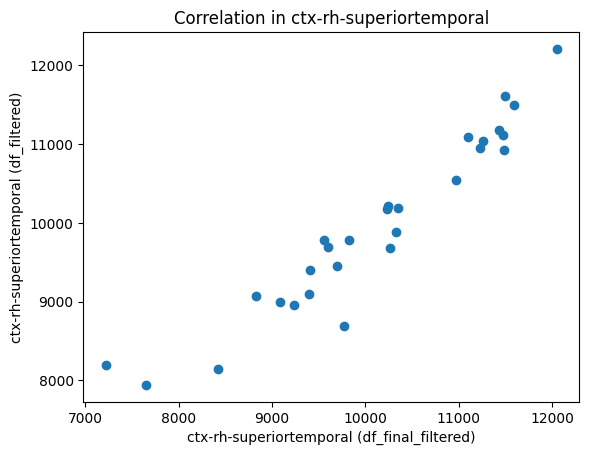


Correlation in ctx-rh-supramarginal: 0.6903783415439927


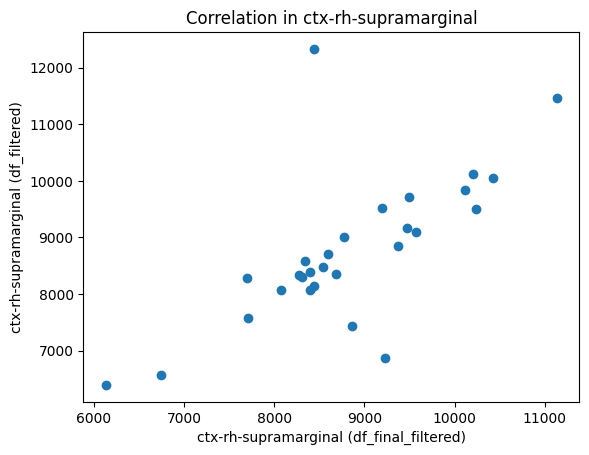


Correlation in ctx-rh-temporalpole: 0.8797014338746322


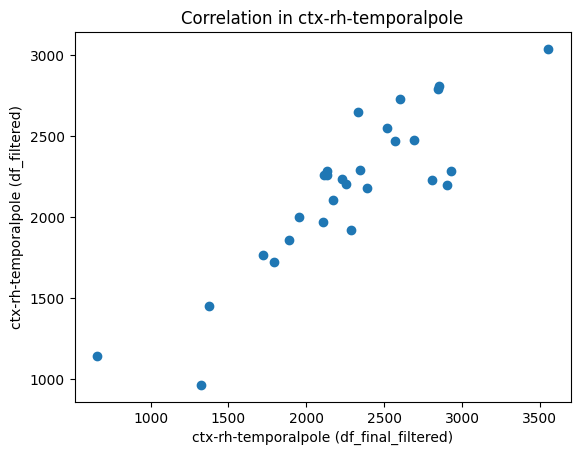


Correlation in ctx-rh-transversetemporal: 0.9366074765924478


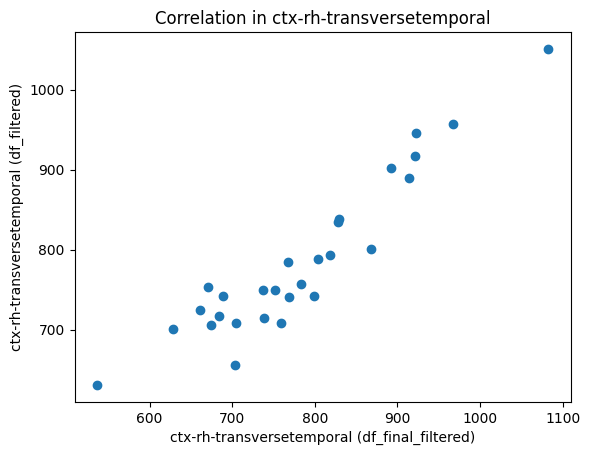


Correlation in ctx-lh-insula: 0.9467206870854793


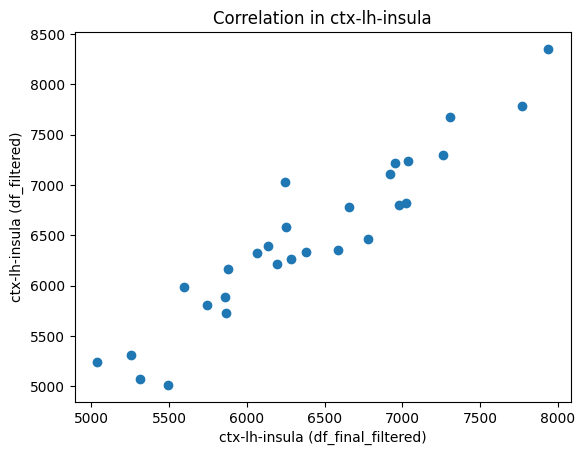


Correlation in ctx-rh-insula: 0.8515031556586008


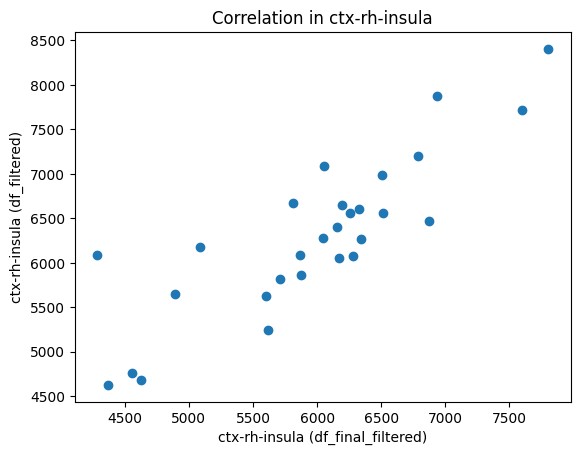


Correlation in ctx-lh-bankssts: 0.9637136358707332


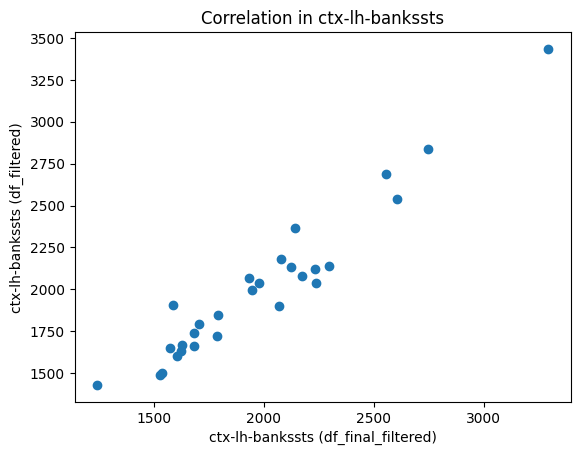


Correlation in ctx-lh-caudalanteriorcingulate: 0.9343196956778472


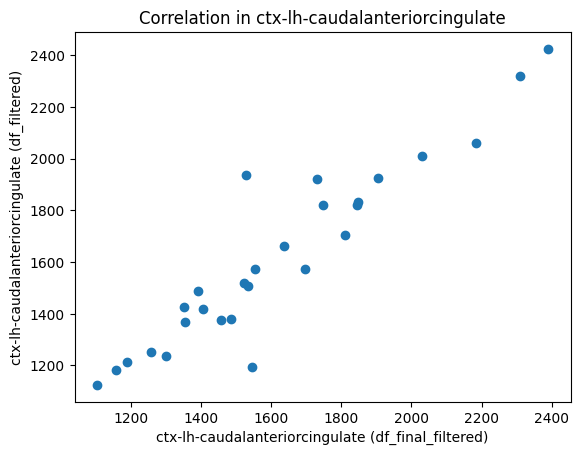


Correlation in ctx-lh-caudalmiddlefrontal: 0.9786955645966909


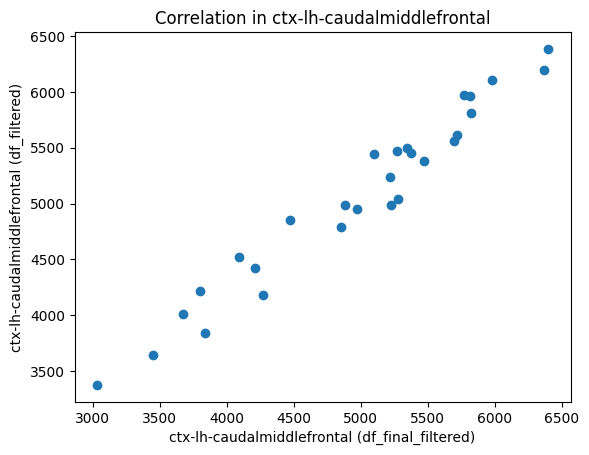


Correlation in ctx-lh-cuneus: 0.946440624488435


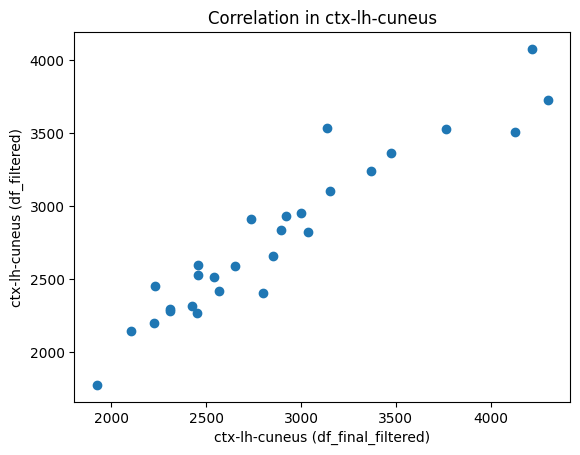


Correlation in ctx-lh-entorhinal: 0.8897122937973266


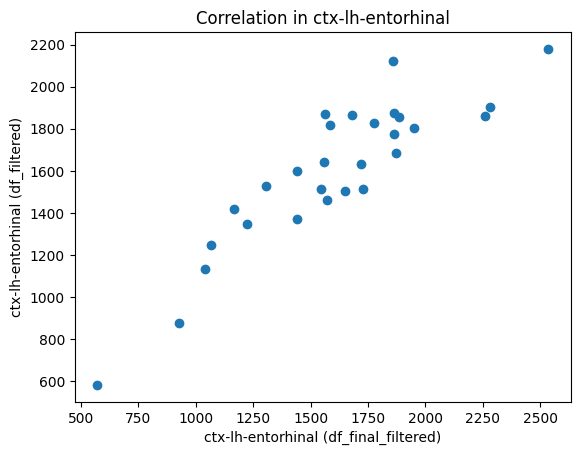


Correlation in ctx-lh-frontalpole: 0.39375419624891583


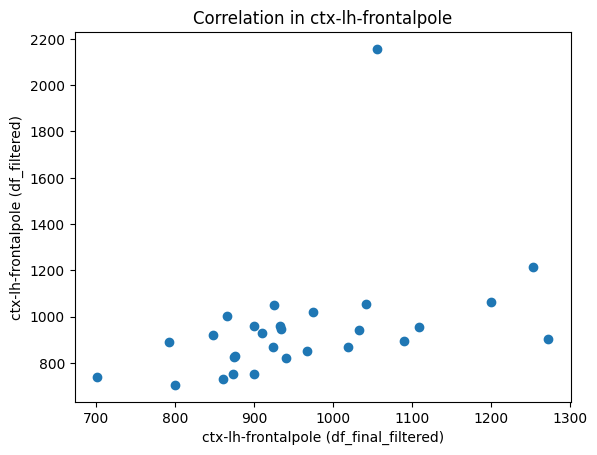


Correlation in ctx-lh-fusiform: 0.9767676392177637


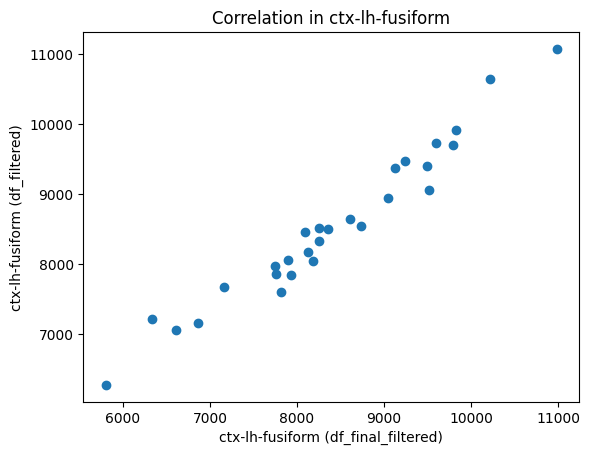


Correlation in ctx-lh-inferiorparietal: 0.9698964908984261


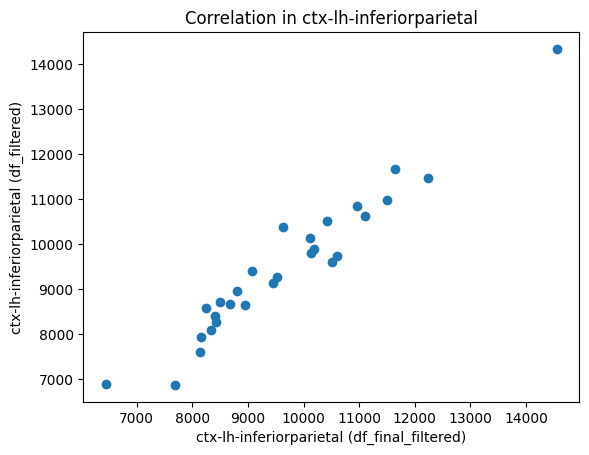


Correlation in ctx-lh-inferiortemporal: 0.9663173761466524


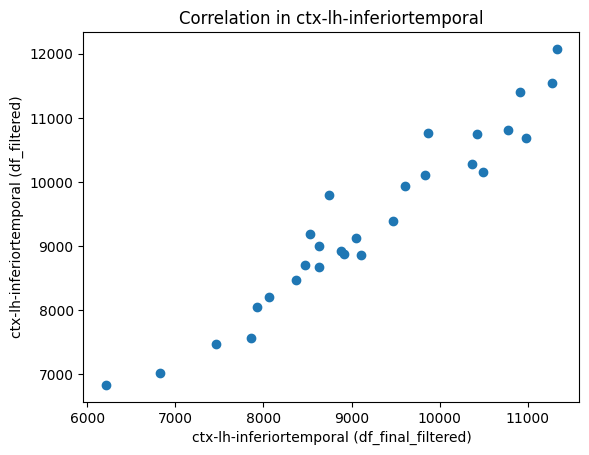


Correlation in ctx-lh-isthmuscingulate: 0.9507807938368167


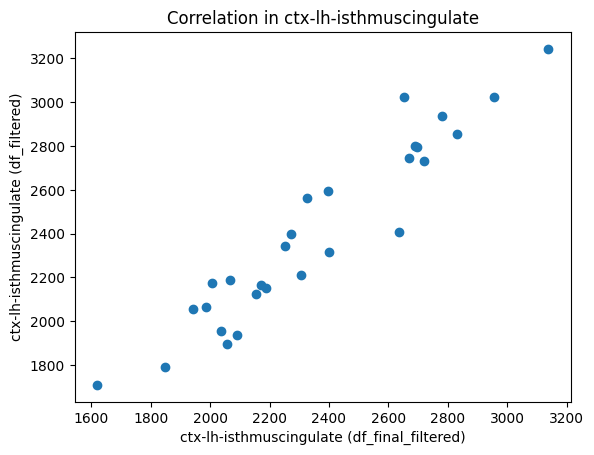


Correlation in ctx-lh-lateraloccipital: 0.9496866745767673


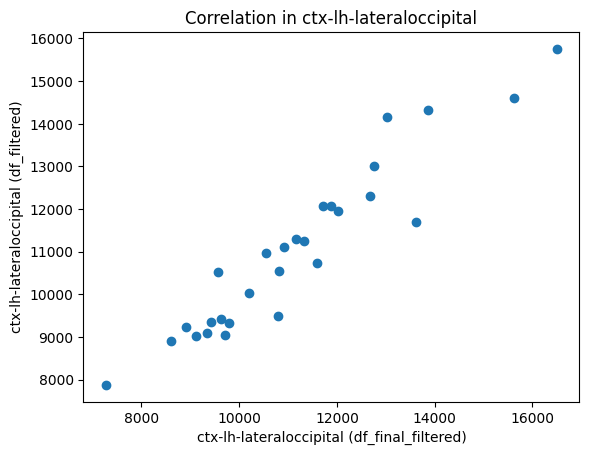


Correlation in ctx-lh-lateralorbitofrontal: 0.9596802002993472


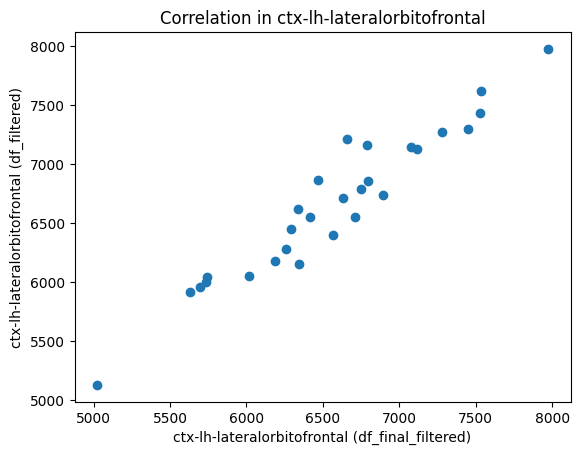


Correlation in ctx-lh-lingual: 0.9726498276329371


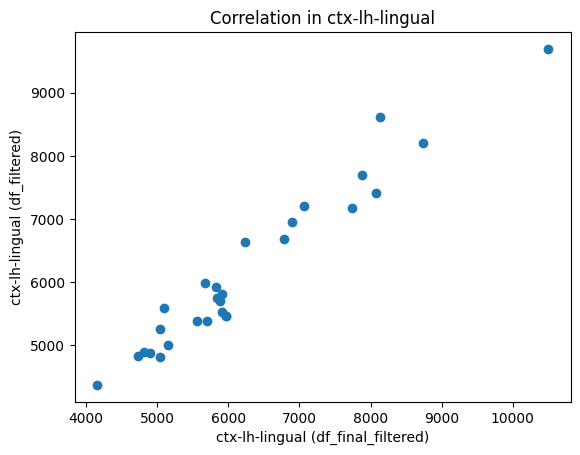


Correlation in ctx-lh-medialorbitofrontal: 0.8413586058321476


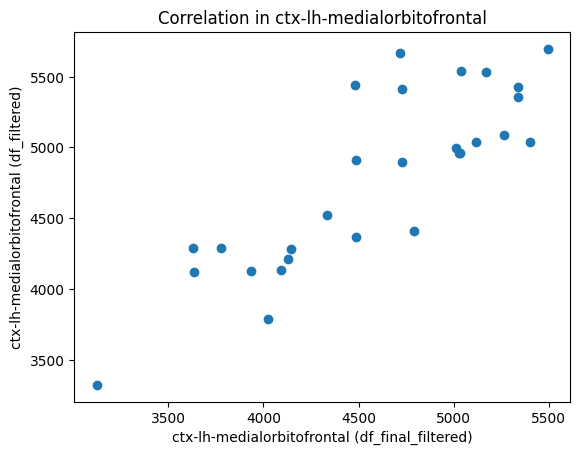


Correlation in ctx-lh-middletemporal: 0.9541967949957616


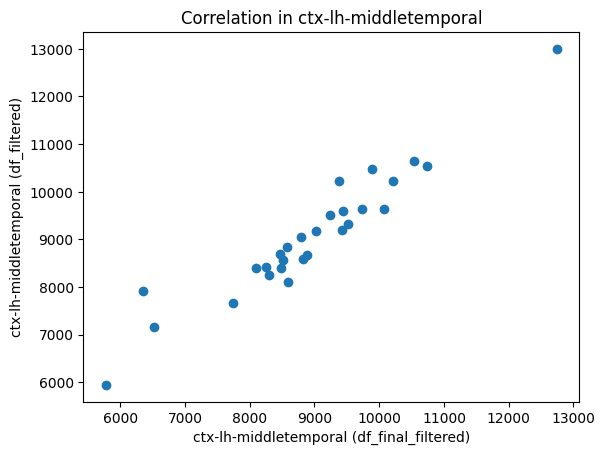


Correlation in ctx-lh-paracentral: 0.9013101408493872


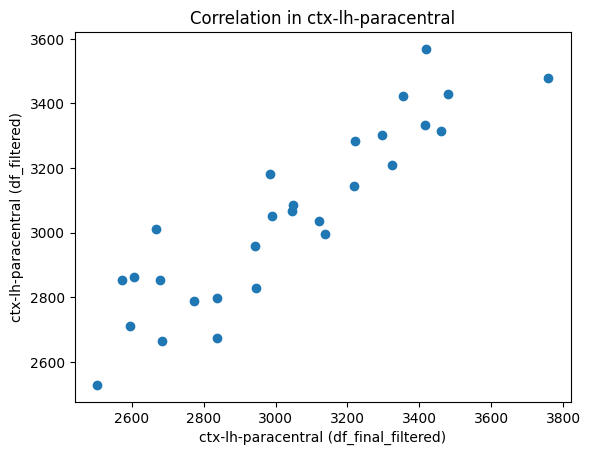


Correlation in ctx-lh-parahippocampal: 0.9358754475098237


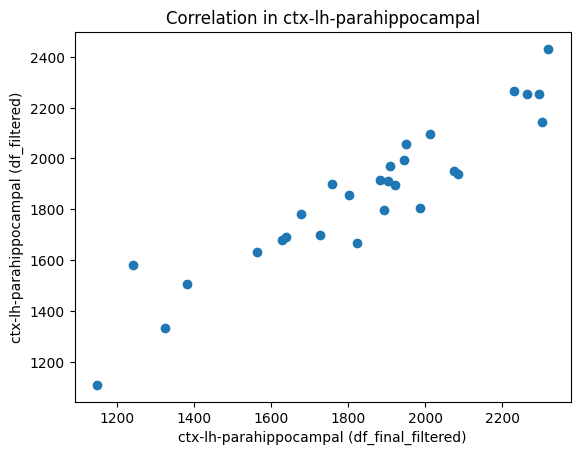


Correlation in ctx-lh-parsopercularis: 0.9704198838084254


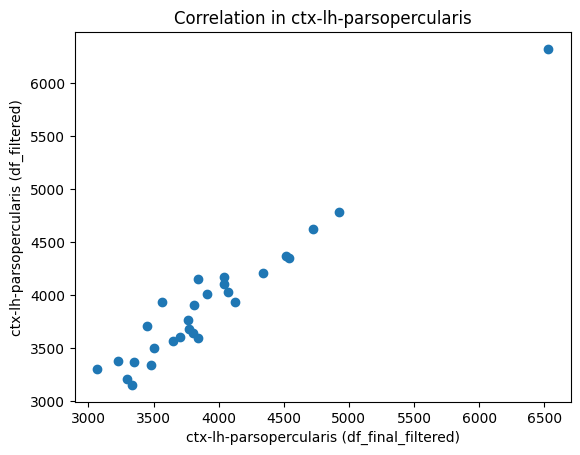


Correlation in ctx-lh-parsorbitalis: 0.6442230174851744


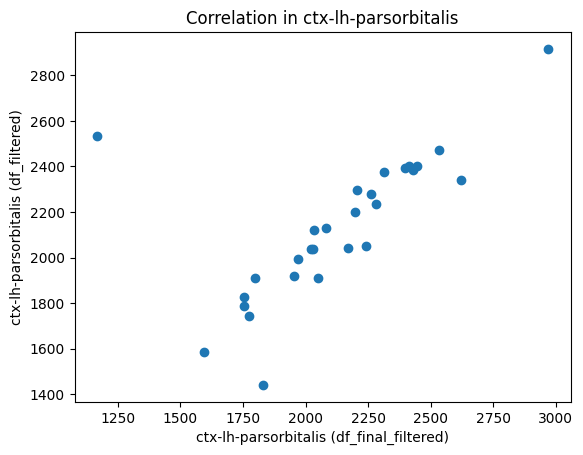


Correlation in ctx-lh-parstriangularis: 0.9348598654776368


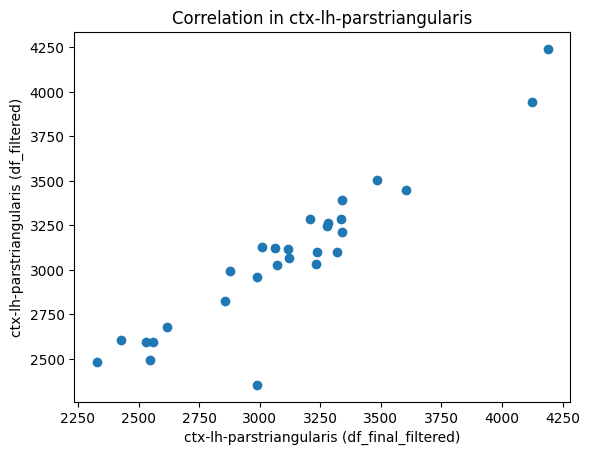


Correlation in ctx-lh-pericalcarine: 0.889812288601738


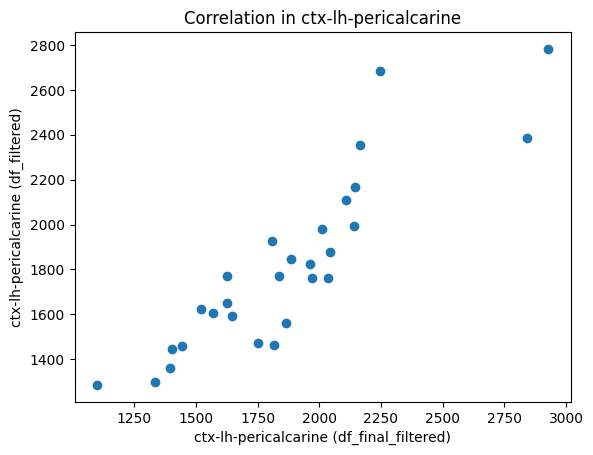


Correlation in ctx-lh-postcentral: 0.964032635859937


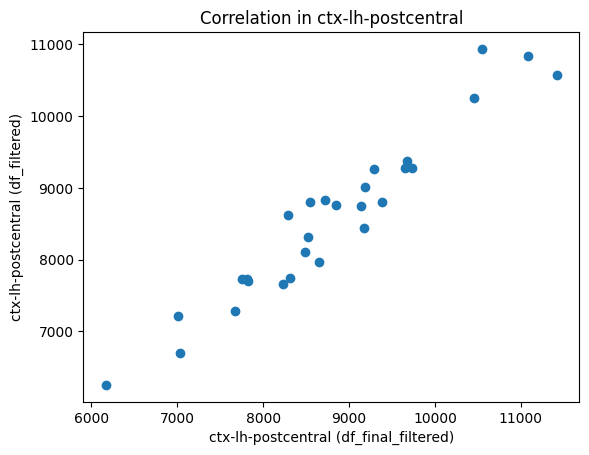


Correlation in ctx-lh-posteriorcingulate: 0.9370895341778966


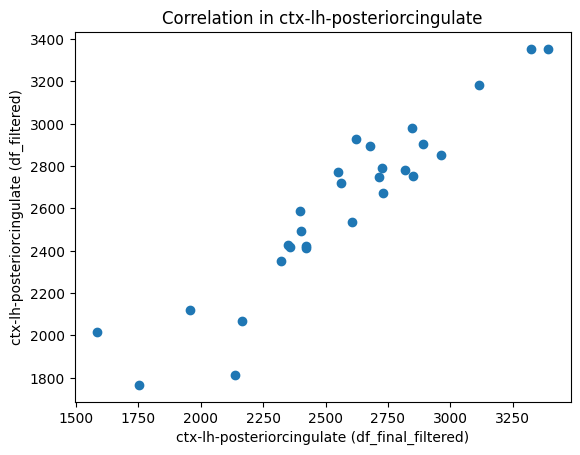


Correlation in ctx-lh-precentral: 0.9511407022386414


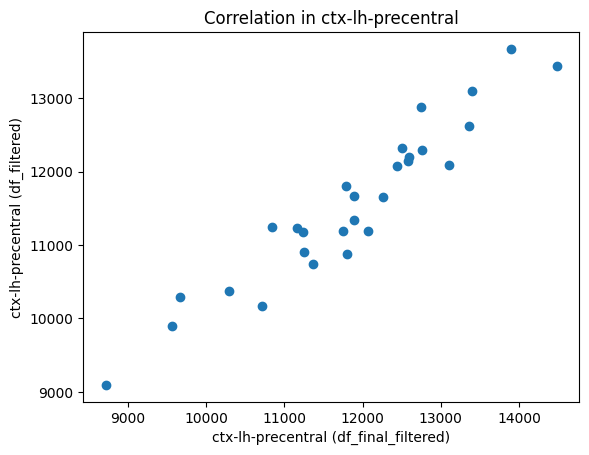


Correlation in ctx-lh-precuneus: 0.9499208878115922


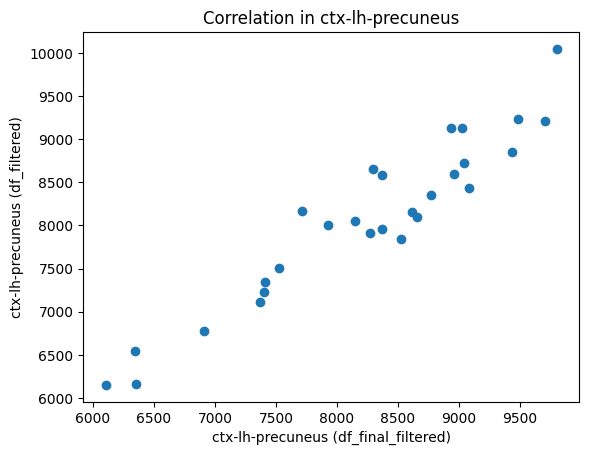


Correlation in ctx-lh-rostralanteriorcingulate: 0.6928998655085716


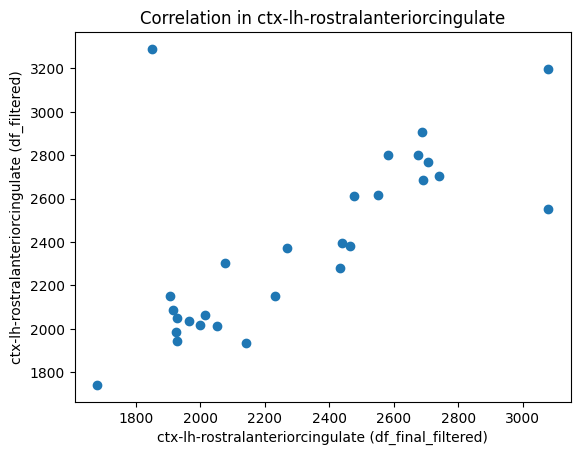


Correlation in ctx-lh-rostralmiddlefrontal: 0.9552486828914277


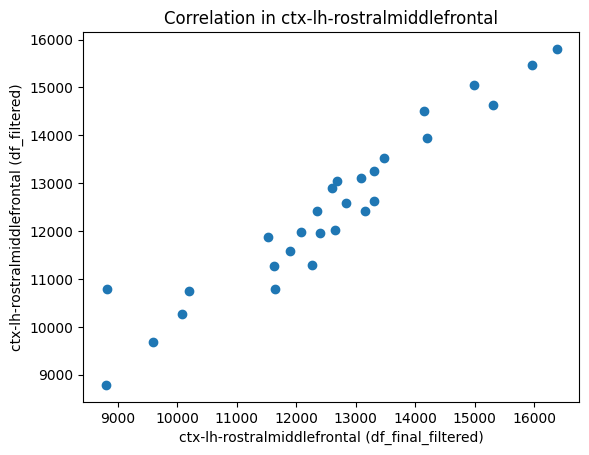


Correlation in ctx-lh-superiorfrontal: 0.9467258877700812


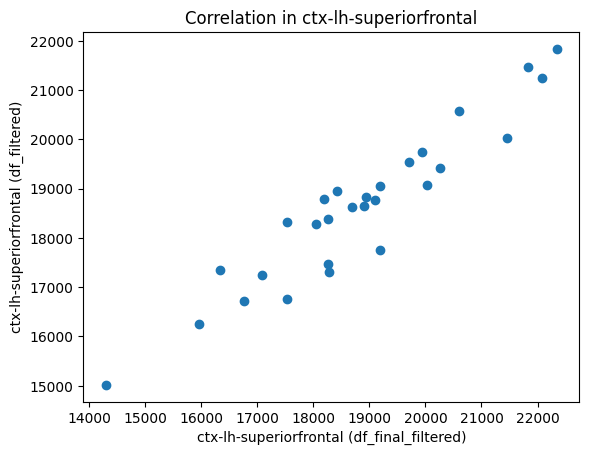


Correlation in ctx-lh-superiorparietal: 0.9572365811993173


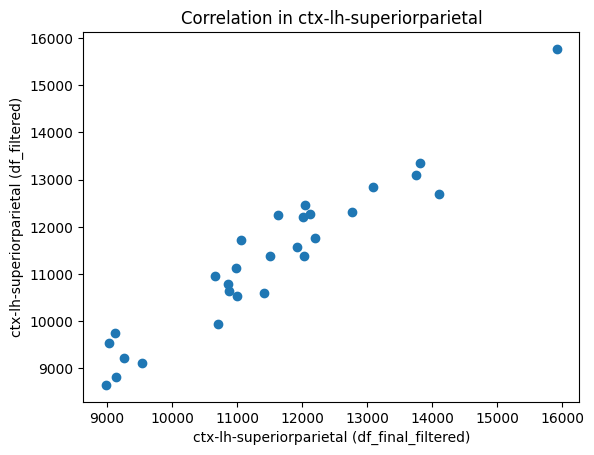


Correlation in ctx-lh-superiortemporal: 0.9684230629516787


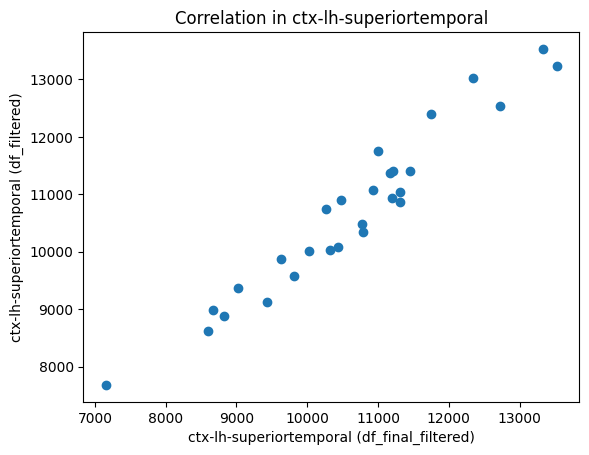


Correlation in ctx-lh-supramarginal: 0.9655148824128374


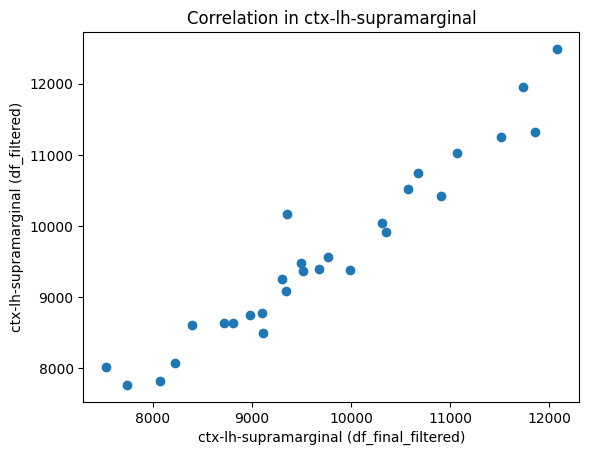


Correlation in ctx-lh-temporalpole: 0.8193254893998682


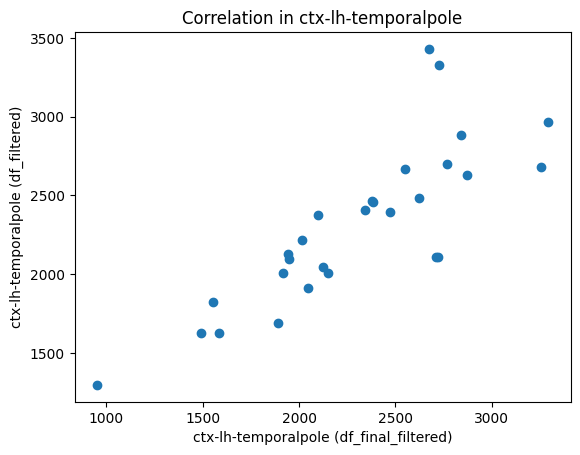


Correlation in ctx-lh-transversetemporal: 0.9351055817102518


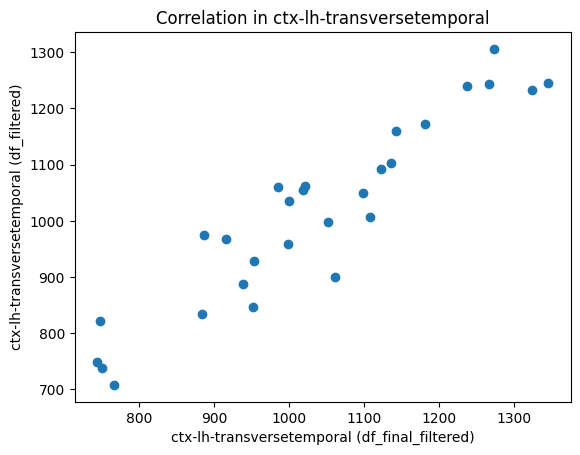


Correlation in ctx-rh-bankssts: 0.9226884524328999


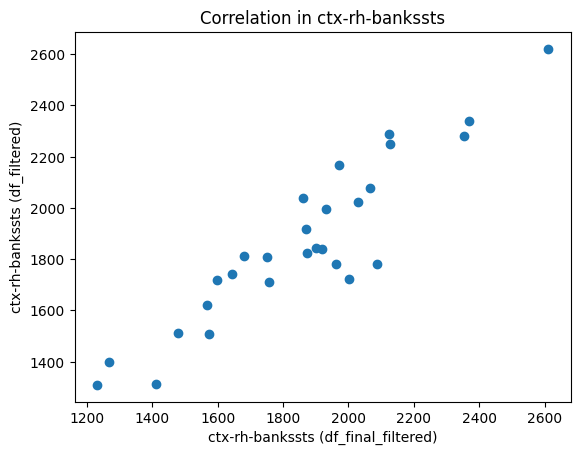


Correlation in ctx-rh-caudalanteriorcingulate: 0.9214665181317655


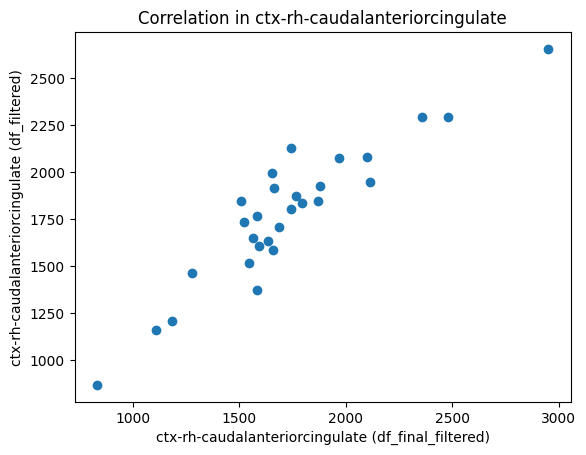


Correlation in ctx-rh-caudalmiddlefrontal: 0.5174055857665135


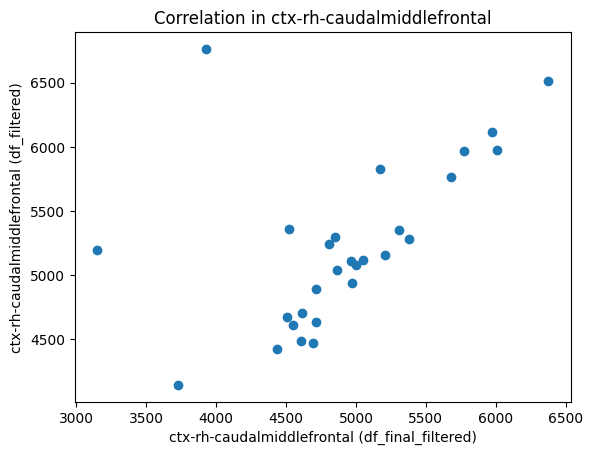


Correlation in ctx-rh-cuneus: 0.9154932961640176


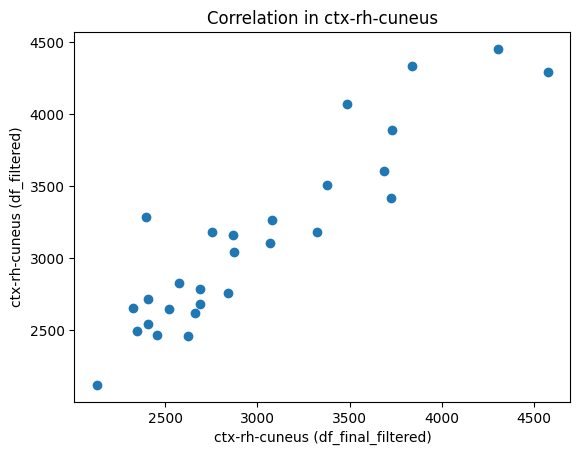


Correlation in ctx-rh-entorhinal: 0.9652524696220263


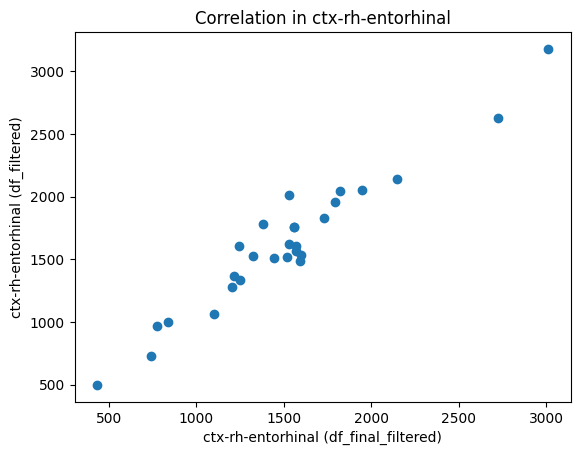


Correlation in ctx-rh-frontalpole: 0.7064536396888583


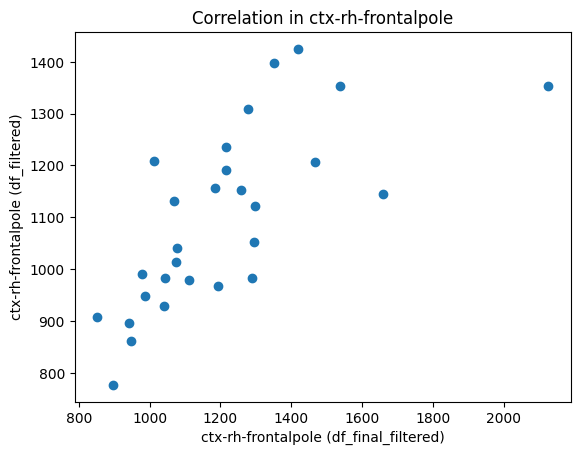


Correlation in ctx-rh-fusiform: 0.9499175371493868


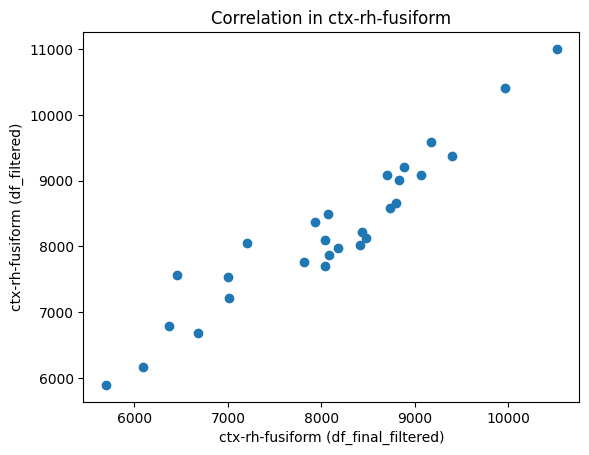


Correlation in ctx-rh-inferiorparietal: 0.9499825676240264


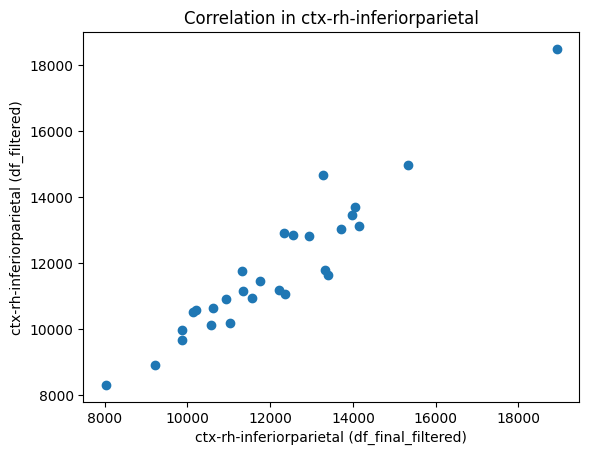


Correlation in ctx-rh-inferiortemporal: 0.9631570541359922


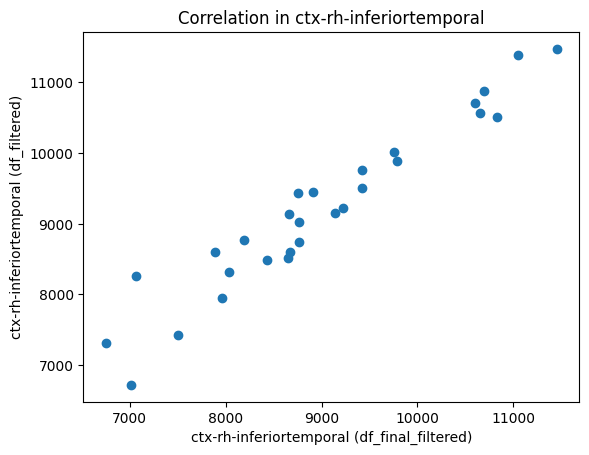


Correlation in ctx-rh-isthmuscingulate: 0.8526768006016918


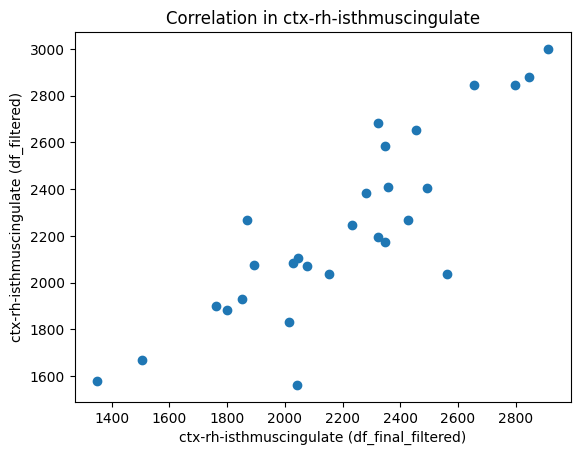


Correlation in ctx-rh-lateraloccipital: 0.9716628888305264


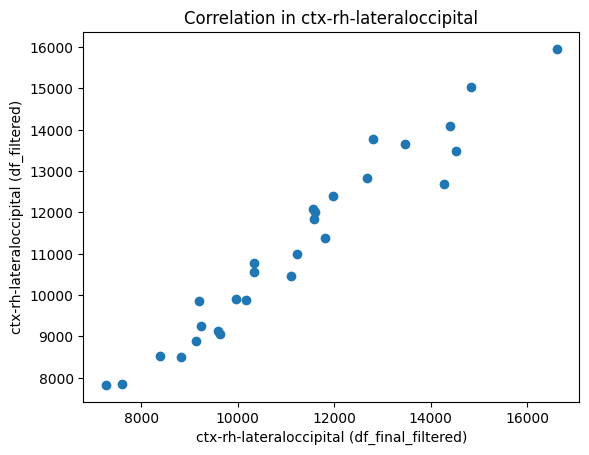


Correlation in ctx-rh-lateralorbitofrontal: 0.7452150923995056


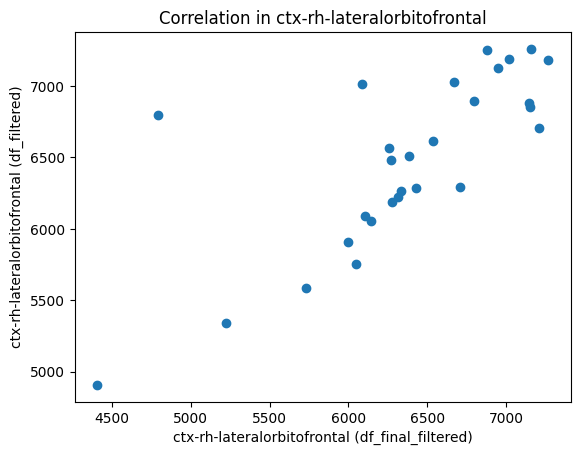


Correlation in ctx-rh-lingual: 0.949186344561078


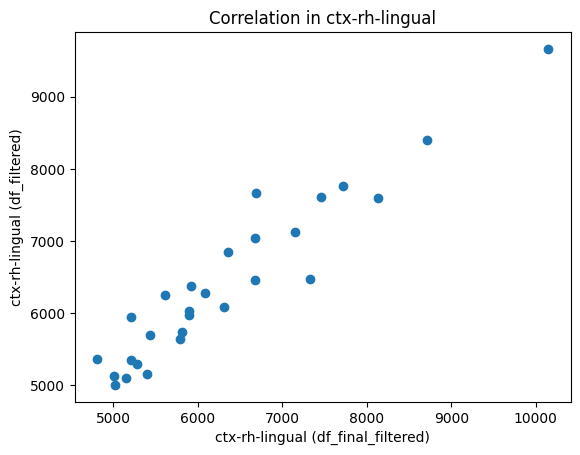


Correlation in ctx-rh-medialorbitofrontal: 0.6761072012218272


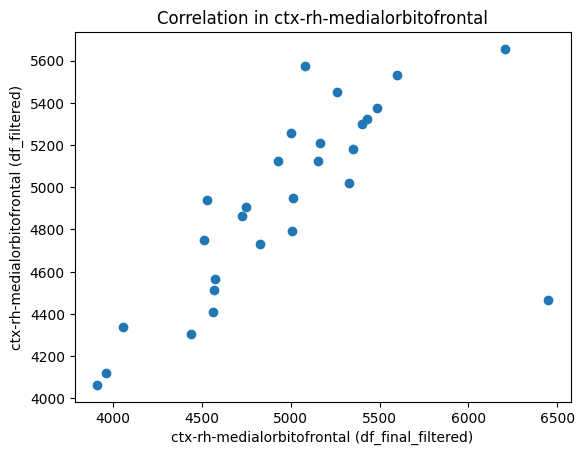


Correlation in ctx-rh-middletemporal: 0.9722008926675171


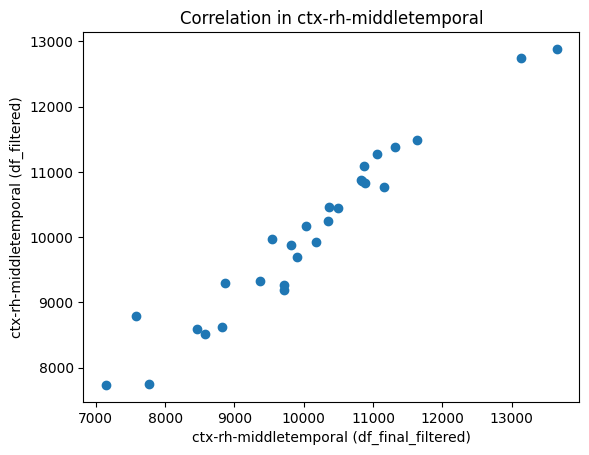


Table of correlations
                      Structure  Correlation
0            ctx-rh-paracentral     0.844111
1        ctx-rh-parahippocampal     0.883127
2        ctx-rh-parsopercularis     0.859613
3          ctx-rh-parsorbitalis     0.781993
4       ctx-rh-parstriangularis     0.802649
..                          ...          ...
63      ctx-rh-lateraloccipital     0.971663
64  ctx-rh-lateralorbitofrontal     0.745215
65               ctx-rh-lingual     0.949186
66   ctx-rh-medialorbitofrontal     0.676107
67        ctx-rh-middletemporal     0.972201

[68 rows x 2 columns]


In [13]:
common_columns = df_final_filtered.columns.intersection(df_filtered.columns)

df_final_filtered = df_final_filtered[common_columns]
df_filtered = df_filtered[common_columns]

df_final_filtered = df_final_filtered.loc[df_filtered.index]
df_filtered = df_filtered.loc[df_final_filtered.index]

correlation_results = []

for col in common_columns:
    df_col_final = df_final_filtered[col].astype(float)
    df_col_filtered = df_filtered[col].astype(float)

    if df_col_final.nunique() > 1 and df_col_filtered.nunique() > 1:
        correlation_value = df_col_final.corr(df_col_filtered)
    else:
        correlation_value = None

    correlation_results.append((col, correlation_value))

    # Imprimir la correlación de la columna actual
    print(f"\n=============================")
    print(f"Correlation in {col}: {correlation_value}")
    print("=============================")

    # Graficar la correlación si es válida
    if correlation_value is not None:
        plt.scatter(df_col_final, df_col_filtered)
        plt.xlabel(f'{col} (df_final_filtered)')
        plt.ylabel(f'{col} (df_filtered)')
        plt.title(f'Correlation in {col}')
        plt.show()

# Convertir resultados en un DataFrame y mostrar
df_correlation_results = pd.DataFrame(correlation_results, columns=['Structure', 'Correlation'])
print("\nTable of correlations")
print(df_correlation_results)

In [14]:
df_correlation_results_sorted = df_correlation_results.sort_values(by="Correlation", ascending=False)

df_original_shape_MeshVolume = df_correlation_results_sorted

df_original_shape_MeshVolume

Structure  Correlation
22   ctx-lh-caudalmiddlefrontal     0.978696
26              ctx-lh-fusiform     0.976768
7     ctx-rh-posteriorcingulate     0.974143
32               ctx-lh-lingual     0.972650
67        ctx-rh-middletemporal     0.972201
..                          ...          ...
38         ctx-lh-parsorbitalis     0.644223
11  ctx-rh-rostralmiddlefrontal     0.634268
13      ctx-rh-superiorparietal     0.581469
55   ctx-rh-caudalmiddlefrontal     0.517406
25           ctx-lh-frontalpole     0.393754

[68 rows x 2 columns]

In [15]:
df_together = df_original_shape_VoxelVolume.merge(
    df_original_shape_MeshVolume[['Structure', 'Correlation']],
    on='Structure',
    how='left',
    suffixes=('_VoxelVolume', '_MeshVolume')
)

df_together.to_csv("CV_Volume.csv", index=False)

df_together

Structure  Correlation_VoxelVolume  \
0    ctx-lh-caudalmiddlefrontal                 0.979258   
1               ctx-lh-fusiform                 0.976854   
2     ctx-rh-posteriorcingulate                 0.973898   
3                ctx-lh-lingual                 0.973511   
4       ctx-rh-lateraloccipital                 0.972492   
..                          ...                      ...   
63         ctx-lh-parsorbitalis                 0.643634   
64  ctx-rh-rostralmiddlefrontal                 0.633868   
65      ctx-rh-superiorparietal                 0.579788   
66   ctx-rh-caudalmiddlefrontal                 0.521308   
67           ctx-lh-frontalpole                 0.416991   

    Correlation_MeshVolume  
0                 0.978696  
1                 0.976768  
2                 0.974143  
3                 0.972650  
4                 0.971663  
..                     ...  
63                0.644223  
64                0.634268  
65                0.581469  
66                0.517406  
67                0.393754  

[68 rows x 3 columns]